<h1 style='color:red'>Lead Scoring Case Study

<h3 style='color:green'> Logistic Regression - Machine Learning 1

`Submission Ganesh Nagappa Shetty & Harish Dave`

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

## Objective
Help X Education select the most promising leads, i.e. the leads that are most likely to convert into paying customers. Build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Table of Contents
<br>**1.Importing & Data Understanding**
<br>**2. Data Cleaning**
    <br> 2.1 Handling of missing values
    <br> 2.2 Data imbalance analysis
    <br> 2.2 Outlier analysis
<br> **3. Data Vizualization**
    <br> 3.1 Bi-variate analysis of categorical variables
    <br> 3.2 Analysis of numerical variables
<br> **4. Preparation for Modeling**
    <br> 4.1 Class imbalance
    <br> 4.2 Binary variables
    <br> 4.3 Dummy variables
    <br> 4.4 Checking correlations
    <br> 4.5 Train Test Split
    <br> 4.5 Scaling
<br>**5. Building the model**
    <br> 5.1 Model-1
    <br> 5.2 RFE Model
    <br> 5.3 Model iterations: Feature elimination
<br>**6. Evaluation of trained model**
    <br> 6.1 Metrics
    <br> 6.2 ROC Curve
    <br> 6.3 Optimium Threshold Value with sensitivity - specificity trade-off
    <br> 6.4 Model with optimal threshold
    <br> 6.5 Precision - Recall trade-off
<br>**7. Prediction with test dataset**
<br>**8. Evaluation with test dataset**
<br>**9. Assignment of lead score**
<br>**10. Conclusion & Recommendation**

## 1: Importing and Data Understanding

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Necessary Libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Importing leads data
leads=pd.read_csv('Leads.csv')

# Lets Create a Copy of leads dataframe which we will need to interpret the results later
leads_copy=leads.copy()

# First Few Lines of data
pd.set_option('display.max_columns', None)
leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [3]:
# Lets drop Prospect ID as it is of no use to us in our study
leads.drop('Prospect ID',axis=1,inplace=True)
leads.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [4]:
# Shape of the data
leads.shape

(9240, 36)

In [5]:
# Information summary of the data
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

<h4 style = 'color:blue'> Observation: Datset contains 4 float variables and of course one integer with Lead converstion. Prominently most of the columns are object type hence a lot of dummy variables can be expected.

## 2: Data Cleaning

### 2.1: Handling of Missing Values

In [6]:
# Total Number of Missing Values accross various variables
leads.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [7]:
# First Few Lines of data
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**Observation:** We can see that atlest 17 variables have missing values in them. Apart from this cetrain categorical variables have **Select** as an entry which are nothing but missing values. Lets identify such entries and convert them as null values before treating the missing values 

In [8]:
# Check what values are there in one of the columns which has Select

leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [9]:
# Extracting Names of categorical variables
cols=leads.columns[leads.dtypes=='object']

# Extracting the names of Variables that have 'Select' as a data point
select=[x for x in cols if sum(leads[x]=='Select')>0]
select

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

Lets replace 'Select' in these variables with null values

In [10]:
# Replacing 'Select' in certain variables with null values
for x in select:
    leads[x] = leads[x].replace(['Select'],np.NaN)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Now lets check all the missing values together and devise a strategy to treat them

In [11]:
# Percentage of missing values in the Data
leadsmiss=pd.DataFrame(leads.isnull().sum()/len(leads)*100)
leadsmiss.rename(columns={0 :'% Missing Values'}, inplace=True)
leadsmiss.sort_values(by='% Missing Values',ascending=False, inplace=True)
leadsmiss=leadsmiss[leadsmiss['% Missing Values']>0]

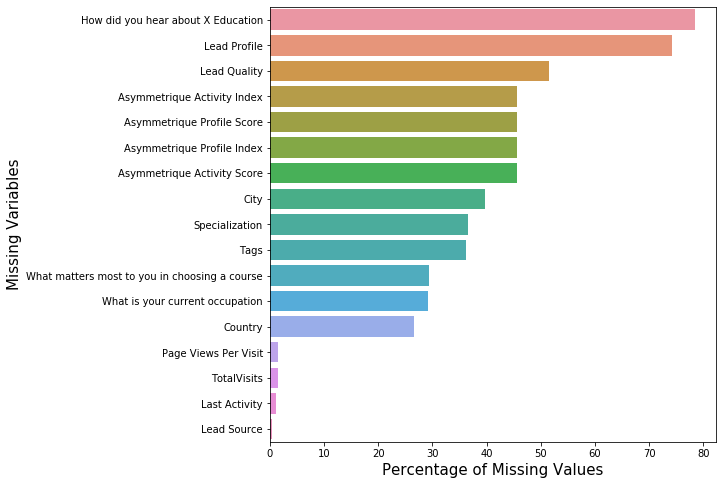

In [12]:
plt.figure(figsize=[8,8])
sns.barplot(x='% Missing Values',y=leadsmiss.index,data=leadsmiss)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Percentage of Missing Values', fontdict = {'fontsize': 15, 'fontweight': 15})
plt.ylabel('Missing Variables', fontdict = {'fontsize': 15, 'fontweight': 15})
plt.show()

**Observation:** 
1. We can observe that atleast 2 variables (**How did you hear about X Education** and **Lead Profile**) have more than 70% missing values. We can drop them from our analysis. 
2. Variables such as 'Tags', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',	'Asymmetrique Profile Score' are the variables entered by Sales team after making calls to the leads. This will not help us in solving the business problem where we have to concentrate on getting probable leads before calling them. Which will help us optimize the process by saving time and cost. We can therefore drop these variables

We will explore and treat the remaining 10 variables individually.

In [13]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [14]:
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
Name: Last Notable Activity, dtype: int64

**Observation:** 
1. **Last Activity** and **Last Notable Activity** seems to have overlapping categories. It is not a good idea to build model on possibly duplicate or nearly similar data columns. Dropping one of these makes sense. Further these both the variables seems to be sales team generated.
2. **Last Activity** was retained since a lot **Last Notable Activity** has a value "Modified" which is not clear to interpret later.

We will explore and treat the remaining 10 variables individually.

In [15]:
# Dropping the variables with higher missing values and variables that make no business sense

leads.drop(['How did you hear about X Education',
            'Lead Profile',
            'Asymmetrique Activity Index', 
            'Asymmetrique Profile Index', 
            'Asymmetrique Activity Score',
            'Asymmetrique Profile Score',
            'Last Notable Activity',
            'Tags'],
           axis=1,inplace=True)

leads.shape

(9240, 28)

Lets explore each of the variables with missing data individually

In [16]:
# Checking the % of Missing Values in the app_new DataFrame
leadsmiss=round(pd.DataFrame(leads.isnull().sum()/len(leads)*100),2)
leadsmiss.rename(columns={0 :'% Missing Values'}, inplace=True)
leadsmiss.sort_values(by='% Missing Values',ascending=False, inplace=True)
leadsmiss=leadsmiss[leadsmiss['% Missing Values']>0]
leadsmiss

,% Missing Values
Lead Quality,51.59
City,39.71
Specialization,36.58
What matters most to you in choosing a course,29.32
What is your current occupation,29.11
Country,26.63
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11
Lead Source,0.39


#### Lead Quality

In [17]:
round(leads['Lead Quality'].value_counts(normalize=True)*100,1)

Might be             34.9
Not Sure             24.4
High in Relevance    14.2
Worst                13.4
Low in Relevance     13.0
Name: Lead Quality, dtype: float64

**Observation:** 
- More than 51% of Lead Quality variables are missing. 
- We can see that entry 'Not Sure' is indicating that quality of the lead isn't sure. It respresents 24% of data
- Missing values can also be considered as not sure as we do not know the quality of the leads for them. 
- In the end for 75% of the data we do not know the quality. 

It is therefore better to drop Lead Quality variable from the analysis

In [18]:
# Dropping 'Lead Quality' variable from the analysis
leads.drop('Lead Quality',axis=1,inplace=True)
leads.shape

(9240, 27)

#### City

In [19]:
# Unique Value counts for City variable
round(leads.City.value_counts(normalize=True)*100,1)

Mumbai                         57.8
Thane & Outskirts              13.5
Other Cities                   12.3
Other Cities of Maharashtra     8.2
Other Metro Cities              6.8
Tier II Cities                  1.3
Name: City, dtype: float64

**Observation:**
- Nearly 40% of City data is missing. 
- Out of the remaining 58% of the people are from Mumbai.
- 40% of the missing values can not be replaced by Mumbai, because the person could be from anywhere.
- From business sense, it might be useful to know which city the person is from.
- Therefore the grouping is done as follows:
    - Mumbai
    - Non-Mumbai
    - Unspecified (missing values)

In [20]:
#Combining low frequency values
leads['City'] = leads['City'].replace(['Thane & Outskirts','Other Cities','Other Cities of Maharashtra','Other Metro Cities',
                                                     'Tier II Cities'] ,'Non-Mumbai')

# Imputing missing values
leads['City'] = leads['City'].fillna('Unspecified')

# Unique Value counts
leads['City'].value_counts()

Unspecified    3669
Mumbai         3222
Non-Mumbai     2349
Name: City, dtype: int64

#### Specialization

In [21]:
# Unique Value counts for Specialization variable
leads.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

**Observation:** Nearly 37% of the data is missing and remaining 63% of the data is distributed among 18 specializations. There is no clear category of specializations which can be selected. Even if we retain missing data as 'Unavailable', it will not make statistical or business sense. We shall therefore drop this from our analysis.

In [22]:
# Dropping 'Specialization'
leads.drop('Specialization',axis=1,inplace=True)
leads.shape

(9240, 26)

#### What matters most to you in choosing a course

In [23]:
# Unique Value counts for 'What matters most to you in choosing a course' variable
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

**Observation:** We can observe that except 3 entries most of data is *Better Career Prospects*. And nearly 30% is missing. If we impute missing values with mode of the data then more than 99% of the data will be *Better Career Prospects*. Such a skewed data is not of any use for us. We will drop this from our analysis

In [24]:
# Dropping 'What matters most to you in choosing a course'
leads.drop('What matters most to you in choosing a course',axis=1,inplace=True)
leads.shape

(9240, 25)

In [25]:
# Checking the % of Missing Values in the app_new DataFrame
leadsmiss=round(pd.DataFrame(leads.isnull().sum()/len(leads)*100),2)
leadsmiss.rename(columns={0 :'% Missing Values'}, inplace=True)
leadsmiss.sort_values(by='% Missing Values',ascending=False, inplace=True)
leadsmiss=leadsmiss[leadsmiss['% Missing Values']>0]
leadsmiss

,% Missing Values
What is your current occupation,29.11
Country,26.63
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11
Lead Source,0.39


#### What is your current occupation

In [26]:
# Unique Value counts for 'What is your current occupation' variable
round(leads['What is your current occupation'].value_counts(normalize=True)*100,1)

Unemployed              85.5
Working Professional    10.8
Student                  3.2
Other                    0.2
Housewife                0.2
Businessman              0.1
Name: What is your current occupation, dtype: float64

**Observation:**
- 29% of current occupation data is missing. 
- Out of the remaining 85% of the people are unemployed
- If we imputate missing current occupation with unemployed, data is going to get more skewed
- From business sense, it might be useful to know if the person is unemployed, working or other 
- Therefore the grouping is done as follows:
    - Unemployed
    - Working Professional
    - Student
    - Others (the rest)
    - Unspecified (missing values)

In [27]:
#Combining low frequency values
leads['What is your current occupation'] = leads['What is your current occupation'].replace(
    ['Other','Other Cities','Housewife','Businessman'] ,'Others')

# Imputing missing values
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Unspecified')

# Unique Value counts
leads['What is your current occupation'].value_counts()

Unemployed              5600
Unspecified             2690
Working Professional     706
Student                  210
Others                    34
Name: What is your current occupation, dtype: int64

#### Country

In [28]:
# Unique Value counts for 'Country' variable
round(leads['Country'].value_counts(normalize=True)*100,1)

India                   95.8
United States            1.0
United Arab Emirates     0.8
Singapore                0.4
Saudi Arabia             0.3
United Kingdom           0.2
Australia                0.2
Qatar                    0.1
Hong Kong                0.1
Bahrain                  0.1
Oman                     0.1
France                   0.1
unknown                  0.1
Kuwait                   0.1
Nigeria                  0.1
Germany                  0.1
Canada                   0.1
South Africa             0.1
Sweden                   0.0
China                    0.0
Italy                    0.0
Uganda                   0.0
Asia/Pacific Region      0.0
Ghana                    0.0
Netherlands              0.0
Philippines              0.0
Bangladesh               0.0
Belgium                  0.0
Kenya                    0.0
Vietnam                  0.0
Indonesia                0.0
Tanzania                 0.0
Sri Lanka                0.0
Denmark                  0.0
Russia        

**Observation:** 95% of the leads are from India and If we impute the missing values with the mode of the data we will end up having a data further skewed. Such a skewed data is of no use for us. We shall drop this from our analysis

In [29]:
# Dropping Country from analysis
leads.drop('Country',axis=1,inplace=True)
leads.shape

(9240, 24)

#### TotalVisits

In [30]:
# Statistical summary of 'TotalVisits' variable
leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

**Observation:** only 1.48% of the data is missing. We can observe that Mean and Median are close and are indicating 3 visits. We shall impute the missing values with median.

In [31]:
# Imputing missing values with 3 visits
leads['TotalVisits'] = leads['TotalVisits'].fillna(leads['TotalVisits'].median())

# Missing values in the 'TotalVisits' variable
leads['TotalVisits'].isnull().sum()

0

#### Page Views Per Visit

In [32]:
# Statistical summary of 'Page Views Per Visit' variable
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

**Observation:** only 1.48% of the data is missing. We can observe that Mean and Median are close and are indicating 2 page views per visit. We shall impute the missing values with median 2 page views

In [33]:
# Imputing missing values with 2 Page views per visit
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median())

# Missing values in the 'Page Views Per Visit' variable
leads['Page Views Per Visit'].isnull().sum()

0

In [34]:
# Checking the % of Missing Values in the app_new DataFrame
leadsmiss=round(pd.DataFrame(leads.isnull().sum()/len(leads)*100),2)
leadsmiss.rename(columns={0 :'% Missing Values'}, inplace=True)
leadsmiss.sort_values(by='% Missing Values',ascending=False, inplace=True)
leadsmiss=leadsmiss[leadsmiss['% Missing Values']>0]
leadsmiss

,% Missing Values
Last Activity,1.11
Lead Source,0.39


#### Lead Source

In [35]:
# Unique Value counts for 'Lead Source' variable
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
welearnblog_Home        1
youtubechannel          1
NC_EDM                  1
testone                 1
blog                    1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64

**Observation:** Less than 0.5% of the data is missing. We can impute this with mode of the data.

In [36]:
# Imputing missing values with mode of the data
leads['Lead Source'] = leads['Lead Source'].fillna(leads['Lead Source'].mode()[0])
leads['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
welearnblog_Home        1
youtubechannel          1
NC_EDM                  1
testone                 1
blog                    1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64

#### Last Activity

In [37]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [38]:
# Imputing missing values with mode of the data
leads['Last Activity'] = leads['Last Activity'].fillna(leads['Last Activity'].mode()[0])
leads['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [39]:
# Checking for Missing values again
leads.isnull().sum()

Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
City                              

Now our data is free of missing values. Lets explore outliers and treat them.

### 2.2: Data Imbalance analysis

In [40]:
categorical_variables = list(leads.select_dtypes(include=['object','category']).columns)
categorical_variables.remove('Lead Origin')
categorical_variables.remove('Lead Source')
categorical_variables.remove('What is your current occupation')
categorical_variables.remove('Last Activity')

In [41]:
# Function to plot histograms
def Count_Plotter (df, var_list):
    plt.style.use('seaborn-darkgrid')
    %matplotlib inline
    fig = plt.figure(figsize = (20,20))
    for item in enumerate(var_list):
        ax1 = fig.add_subplot(5, 3, item[0]+1)
        plt.subplot(ax1)
        sns.countplot(data = df, x=item[1], palette='muted')
        plt.xlabel(item[1], fontsize=18)
        plt.xticks(rotation=90, fontsize=18)
    plt.tight_layout()
    plt.show()
    return

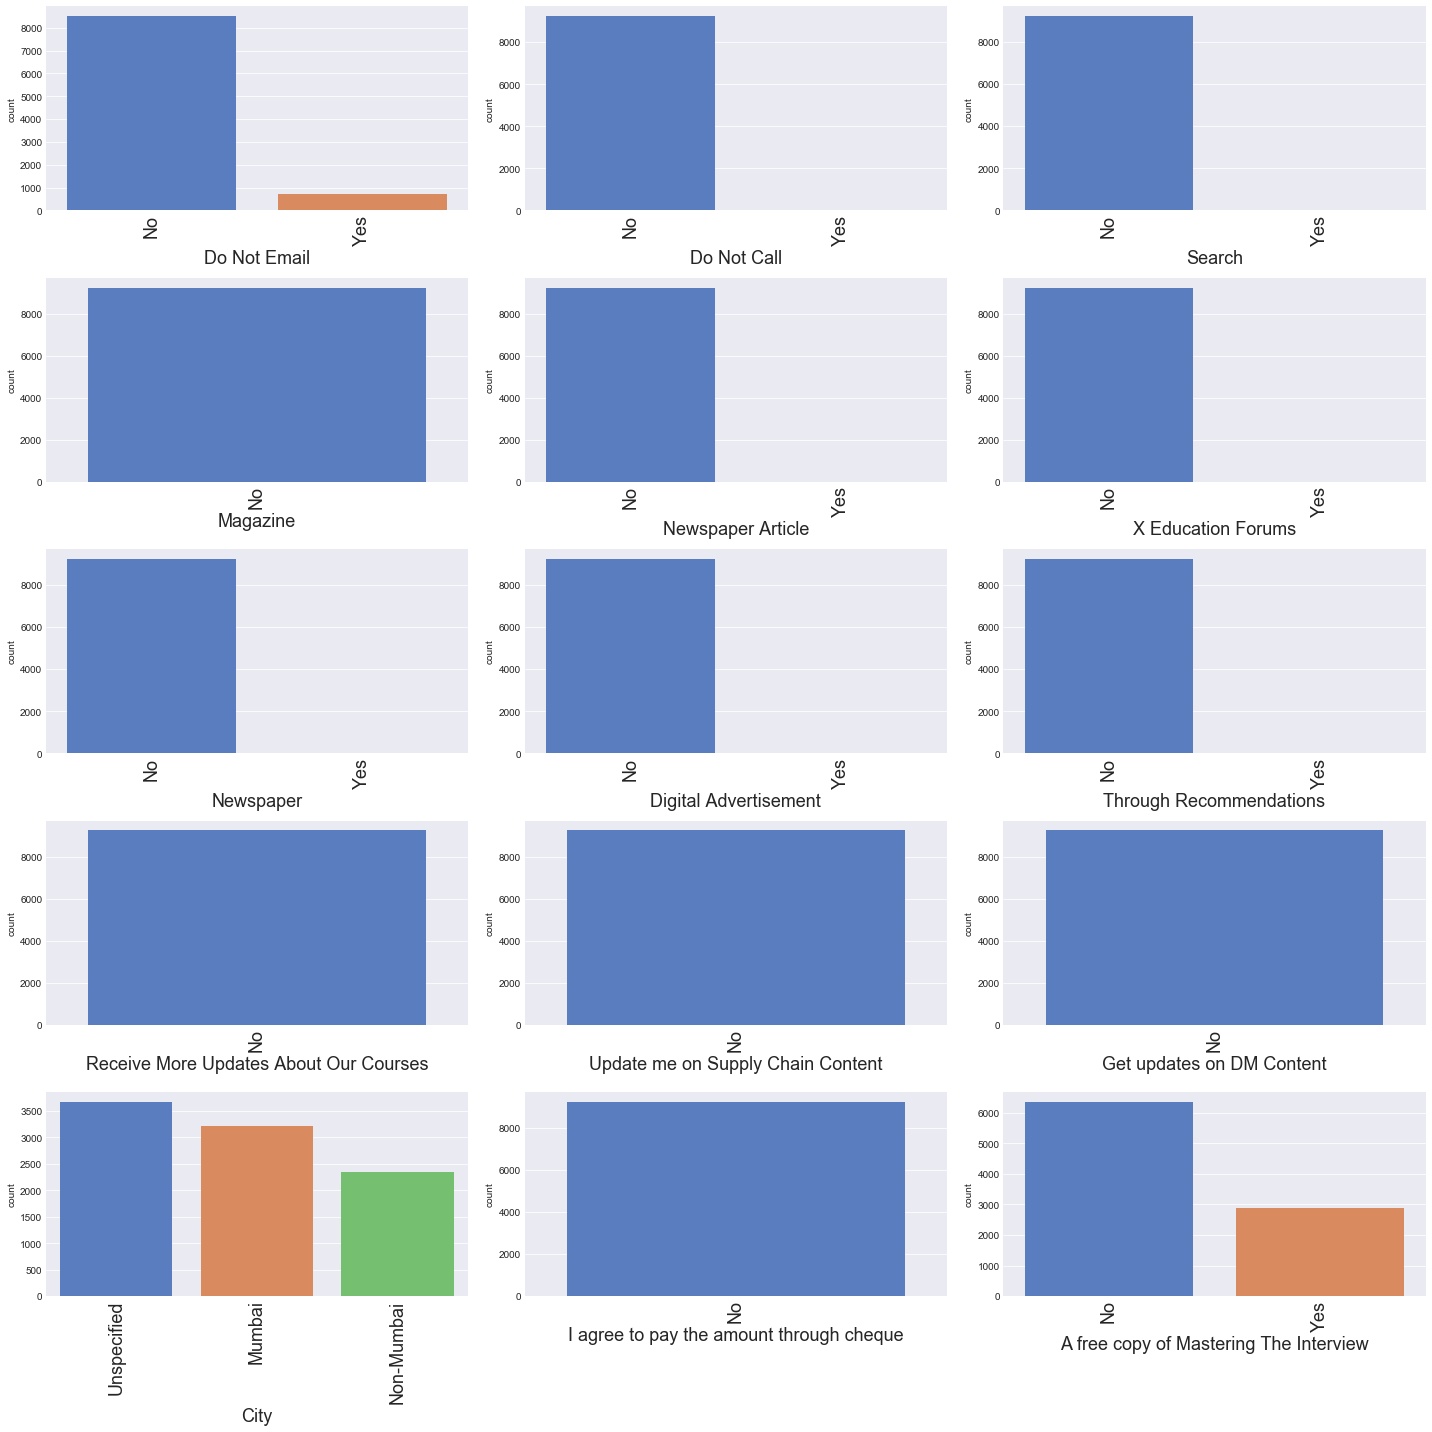

In [42]:
Count_Plotter(leads, categorical_variables)

We have several variables with highly imbalanced data. Lets treat them.

In [43]:
# Variables with Imbalanced Data
cols = ['Do Not Call','Search', 'Magazine', 'Newspaper Article','X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content',
        'Get updates on DM Content','I agree to pay the amount through cheque']

In [44]:
# Checking the Unique Value counts for imbalanced data
for col in cols:
    print("Unique Value counts for '{}' variable".format(col))
    print(leads[col].value_counts())
    print('\n')

Unique Value counts for 'Do Not Call' variable
No     9238
Yes       2
Name: Do Not Call, dtype: int64


Unique Value counts for 'Search' variable
No     9226
Yes      14
Name: Search, dtype: int64


Unique Value counts for 'Magazine' variable
No    9240
Name: Magazine, dtype: int64


Unique Value counts for 'Newspaper Article' variable
No     9238
Yes       2
Name: Newspaper Article, dtype: int64


Unique Value counts for 'X Education Forums' variable
No     9239
Yes       1
Name: X Education Forums, dtype: int64


Unique Value counts for 'Newspaper' variable
No     9239
Yes       1
Name: Newspaper, dtype: int64


Unique Value counts for 'Digital Advertisement' variable
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64


Unique Value counts for 'Through Recommendations' variable
No     9233
Yes       7
Name: Through Recommendations, dtype: int64


Unique Value counts for 'Receive More Updates About Our Courses' variable
No    9240
Name: Receive More Updates About Our C

**Observation:** Lets drop them from our analysis as they do not help us in great way

In [45]:
# Dropping variables with data imbalance from the dataset
leads.drop(cols,axis=1,inplace=True)
leads.shape

(9240, 12)

In [46]:
# First Few lines of the data
leads.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Unspecified,No
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Unspecified,No


In [47]:
# Reorder the columns for better readablity
col_ordered = ['Lead Number', 'Converted',
                      'TotalVisits', 'Total Time Spent on Website','Page Views Per Visit', 
               'Lead Origin', 'Lead Source', 'City', 'What is your current occupation',
               'Do Not Email','A free copy of Mastering The Interview', 
               'Last Activity']
leads = leads.reindex(columns=col_ordered)
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin,Lead Source,City,What is your current occupation,Do Not Email,A free copy of Mastering The Interview,Last Activity
0,660737,0,0.0,0,0.0,API,Olark Chat,Unspecified,Unemployed,No,No,Page Visited on Website
1,660728,0,5.0,674,2.5,API,Organic Search,Unspecified,Unemployed,No,No,Email Opened
2,660727,1,2.0,1532,2.0,Landing Page Submission,Direct Traffic,Mumbai,Student,No,Yes,Email Opened
3,660719,0,1.0,305,1.0,Landing Page Submission,Direct Traffic,Mumbai,Unemployed,No,No,Unreachable
4,660681,1,2.0,1428,1.0,Landing Page Submission,Google,Mumbai,Unemployed,No,No,Converted to Lead


In [48]:
leads.isna().sum()

Lead Number                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Lead Origin                               0
Lead Source                               0
City                                      0
What is your current occupation           0
Do Not Email                              0
A free copy of Mastering The Interview    0
Last Activity                             0
dtype: int64

Data is clean for next stage

### 2.3: Handling of Outliers

#### 2.3.1: Categorical Variables

Lets analyse the Outliers in Categorical variables

In [49]:
# Categorical Variables in the data
leads.columns[leads.dtypes=='object']

Index(['Lead Origin', 'Lead Source', 'City', 'What is your current occupation',
       'Do Not Email', 'A free copy of Mastering The Interview',
       'Last Activity'],
      dtype='object')

Lets check the outliers individually and treat them. We will write a custom function to generate the count plots.

In [50]:
# Function to plot counts
def Bar_Plot (df, var_name):
    plt.style.use('seaborn-darkgrid')
    %matplotlib inline
    fig = plt.figure(figsize = (12,7))
    data = df[var_name].value_counts()
    sns.barplot(y = data.index, x = data, orient='h', palette='muted')
    plt.title(var_name + '\n', fontsize=20)
    plt.tight_layout()
    plt.yticks(fontsize = 14)
    plt.xlabel('Count', fontsize = 14)
    plt.show()
    return

#### Lead Origin

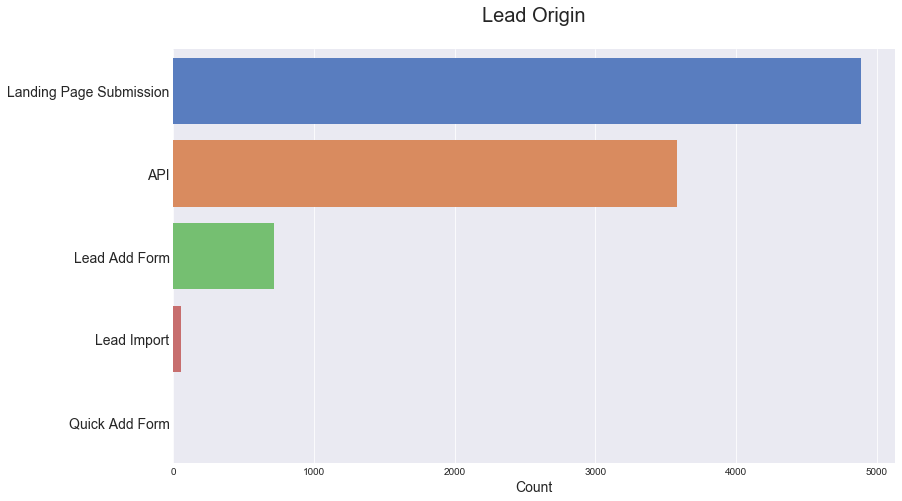

In [51]:
# Distribution of Lead Origin
Bar_Plot(leads,'Lead Origin')

In [52]:
# Unique Value counts for 'Lead Origin' variable
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

**Observation:** 'Quick Add Form' has only one entry in 'Lead Origin' variable. This information will not help us much and can be regarded as an outlier. Since it is only one entry in a large dataset we shall drop this from our analysis

In [53]:
# Dropping the entry 'Quick Add Form' from 'Lead Origin' variable
leads=leads[leads['Lead Origin']!='Quick Add Form']
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Name: Lead Origin, dtype: int64

#### Lead Source

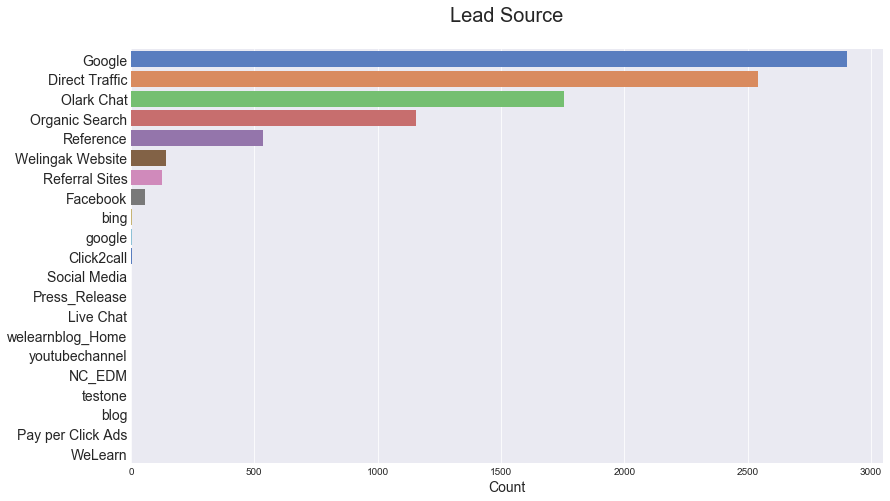

In [54]:
Bar_Plot(leads,'Lead Source')

In [55]:
# Unique Value counts for 'Lead Source' variable
leads['Lead Source'].value_counts()

Google               2903
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
welearnblog_Home        1
youtubechannel          1
NC_EDM                  1
testone                 1
blog                    1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64

**Observation:**
1. google with 5 entries is same as Google. Replace google with Google
2. entries as 'Social Media' can be clubbed with 'Facebook' to form 'Social Media'
3. bing, Click2call, Live Chat, Press_Release, welearnblog_Home, NC_EDM, Pay per Click Ads, youtubechannel, WeLearn, blog and testone can be clubbed together as 'Others' as they have less number of entries

In [56]:
#Combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Live Chat','Press_Release',
                                                     'welearnblog_Home','NC_EDM','Pay per Click Ads',
                                                     'youtubechannel','WeLearn','blog','testone'] ,'Others')
# Unique Value counts for 'Lead Source' variable
leads['Lead Source'].value_counts()

Google              2908
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                21
Name: Lead Source, dtype: int64

#### City

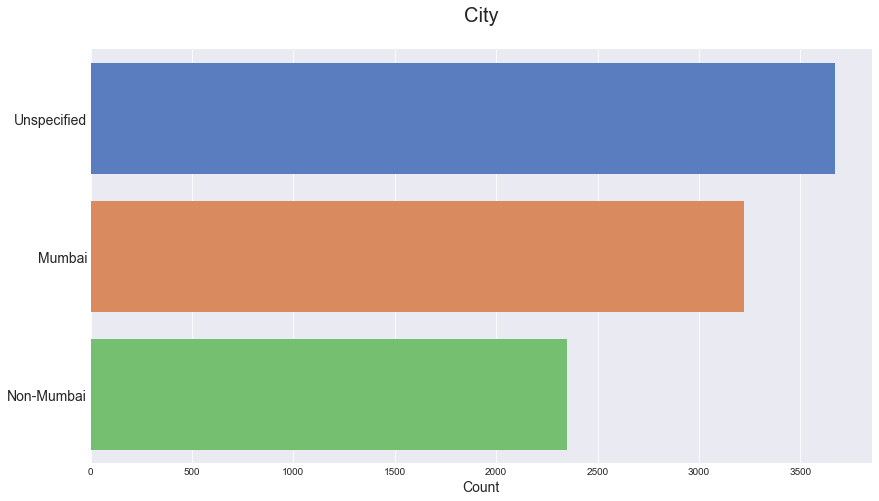

In [57]:
Bar_Plot(leads,'City')

In [58]:
# Unique Value counts for 'Lead Source' variable
leads['City'].value_counts()

Unspecified    3669
Mumbai         3222
Non-Mumbai     2348
Name: City, dtype: int64

City data column is free of outliers.

#### Do Not Email

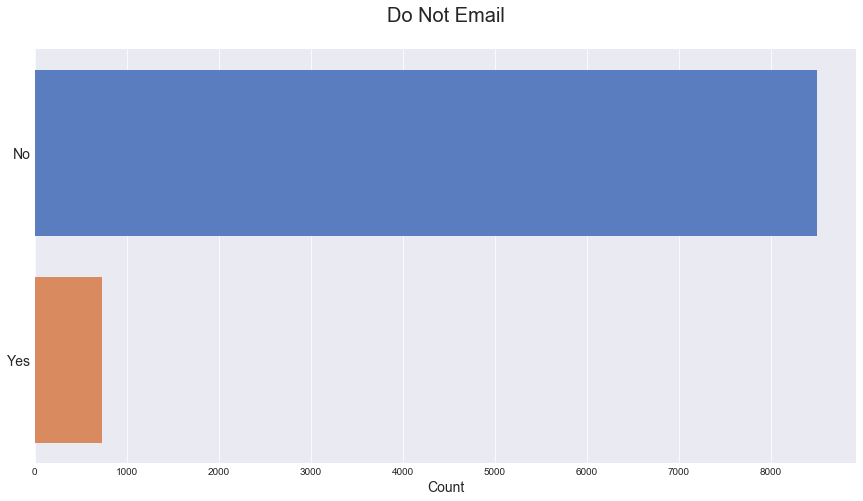

In [59]:
# Distribution of Do Not Email
Bar_Plot(leads,'Do Not Email')

In [60]:
# Unique Value counts for 'Do Not Email' variable
leads['Do Not Email'].value_counts()

No     8506
Yes     733
Name: Do Not Email, dtype: int64

**Observation:** The data of Do Not Email is good enough and is without outliers. We will not alter the data

#### What is your current occupation

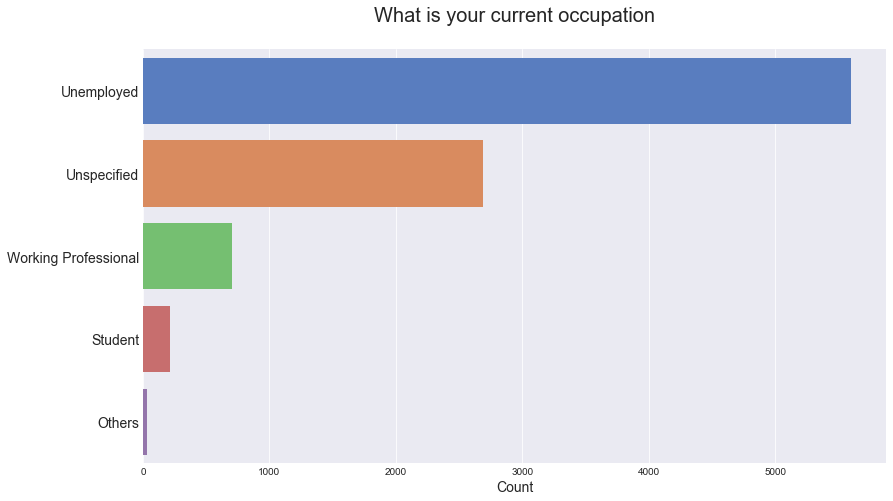

In [61]:
# Distribution of 'What is your current occupation' variable

Bar_Plot(leads,'What is your current occupation')

In [62]:
# Unique Value counts for 'What is your current occupation' variable
leads['What is your current occupation'].value_counts()

Unemployed              5599
Unspecified             2690
Working Professional     706
Student                  210
Others                    34
Name: What is your current occupation, dtype: int64

**Observation:** The data makes sense and doesn't need any treatment

#### A free copy of Mastering The Interview

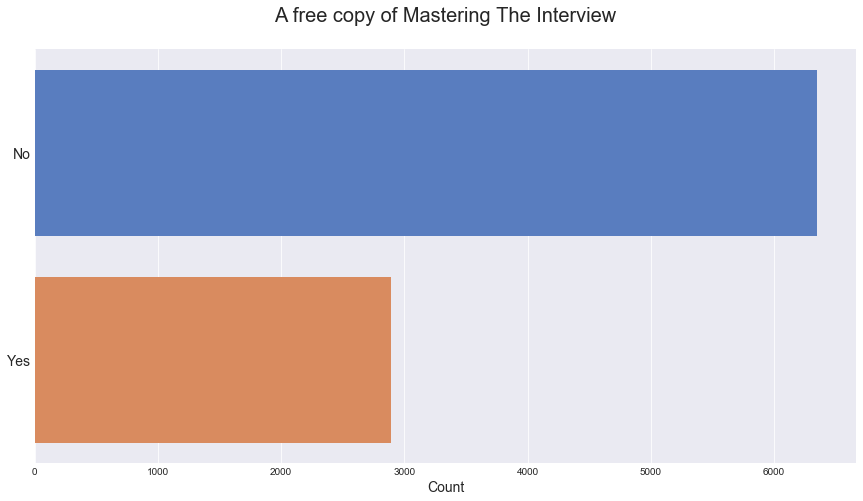

In [63]:
# Distribution of 'A free copy of Mastering The Interview' variable
Bar_Plot(leads,'A free copy of Mastering The Interview')

In [64]:
# Unique Value counts for 'A free copy of Mastering The Interview' variable
leads['A free copy of Mastering The Interview'].value_counts()

No     6351
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

Variable 'A free copy of Mastering The Interview' is free of outliers

#### Last Activity

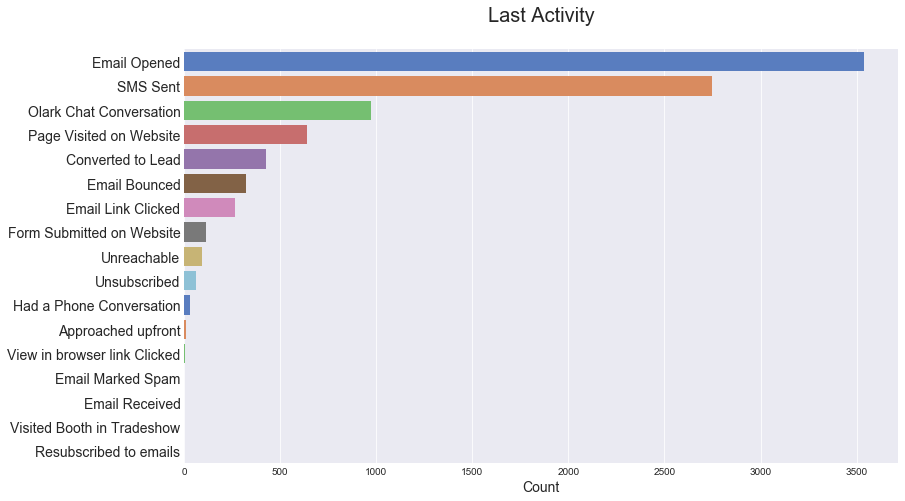

In [65]:
# Distribution of 'Last Notable Activity' variable
Bar_Plot(leads,'Last Activity')

In [66]:
# Unique Value counts for 'Last Activity' variable
leads['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    325
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Lets combine all low frequency (less than 100) entries as 'Others'

In [67]:
#Combining low frequency values
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                     'View in browser link Clicked','Email Marked Spam','Email Received',
                                                     'Visited Booth in Tradeshow','Resubscribed to emails'] ,'Others')
# Unique Value counts for 'Last Activity' variable
leads['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 325
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

Now we have a data where all categorical values are free of Outliers. Lets Check for outliers in Numerical variables

#### 2.3.2: Numerical Variables

Lets analize the Outliers in Numerical variables

In [68]:
# Numerical Variables in the data

leads.columns[leads.dtypes!='object']

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

**Observation:** Lead Number is a Unique value and Converted is a target value. Lets not alter them. We shall check other variables

In [69]:
# Numerical Variables
cols=['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

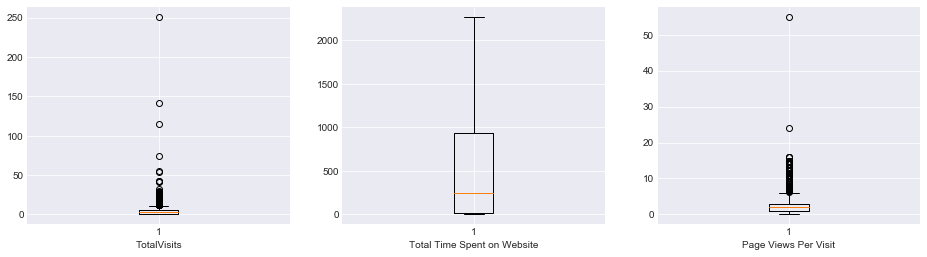

In [70]:
# Box Plot to check outliers in Numerical Data
plt. figure(figsize=(16,4))
for col in enumerate(cols):
    plt.subplot(1,3,col[0]+1)
    plt.boxplot(leads[col[1]])
    plt.xlabel(cols[col[0]])

In [71]:
# Statistical summary of the numerical data
leads[cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9239.000000,9239.000000,9239.000000
mean,3.438684,487.511094,2.357479
std,4.819282,547.755682,2.145894
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


**Observation:** 
- We can see that 'TotalVisits' and 'Page Views Per Visit' have outliers in them. We will cap the data of these variables within 3 times the IQR (Inter Quartile Range) from 99 percentile of the data

In [72]:
# capping the data of 'TotalVisits' within 3 times the IQR
Q1=np.percentile(leads['TotalVisits'],25)
Q3=np.percentile(leads['TotalVisits'],75)
IQR=Q3-Q1
leads=leads[leads['TotalVisits']<(np.percentile(leads['TotalVisits'],99)+3*IQR)]
leads.shape

(9226, 12)

In [73]:
# capping the data of 'Page Views Per Visit' within 3 times the IQR
Q1=np.percentile(leads['Page Views Per Visit'],25)
Q3=np.percentile(leads['Page Views Per Visit'],75)
IQR=Q3-Q1
leads=leads[leads['Page Views Per Visit']<(np.percentile(leads['Page Views Per Visit'],99)+3*IQR)]
leads.shape

(9218, 12)

In [74]:
# Statistical summary of the numerical data
leads[['TotalVisits','Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9218.000000,9218.000000
mean,3.330657,2.334831
std,3.340926,2.023169
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,28.000000,14.000000


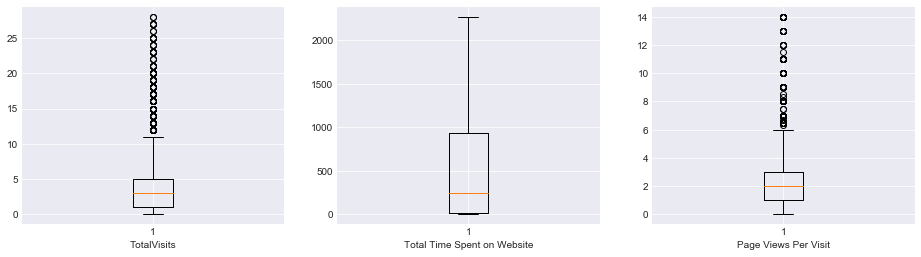

In [75]:
# Box Plot to check outliers in Numerical Data
plt. figure(figsize=(16,4))
for col in enumerate(cols):
    plt.subplot(1,3,col[0]+1)
    plt.boxplot(leads[col[1]])
    plt.xlabel(cols[col[0]])

**Observation:** Now most of the data looks like continuously increasing. We can therefore safely believe that our data is free of Outliers.

## 3: Data Visualization

In [76]:
leads.shape

(9218, 12)

In [77]:
# First few lines of the data
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin,Lead Source,City,What is your current occupation,Do Not Email,A free copy of Mastering The Interview,Last Activity
0,660737,0,0.0,0,0.0,API,Olark Chat,Unspecified,Unemployed,No,No,Page Visited on Website
1,660728,0,5.0,674,2.5,API,Organic Search,Unspecified,Unemployed,No,No,Email Opened
2,660727,1,2.0,1532,2.0,Landing Page Submission,Direct Traffic,Mumbai,Student,No,Yes,Email Opened
3,660719,0,1.0,305,1.0,Landing Page Submission,Direct Traffic,Mumbai,Unemployed,No,No,Others
4,660681,1,2.0,1428,1.0,Landing Page Submission,Google,Mumbai,Unemployed,No,No,Converted to Lead


Lets explore the Categorical Variables together

### 3.1: Bi-Variate analysis of Categorical Variables

In [78]:
# List of Categorical Variable names
leads.columns[leads.dtypes=='object']

Index(['Lead Origin', 'Lead Source', 'City', 'What is your current occupation',
       'Do Not Email', 'A free copy of Mastering The Interview',
       'Last Activity'],
      dtype='object')

Lets Visualize Categorical Variables

In [79]:
# Function to plot Categorical Data
def plotcategorical(col1,col2):
    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    sns.countplot(x=col1,data=leads,hue='Converted',palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel(col1,fontdict={'fontsize':15, 'color':'Blue'})
    plt.ylabel('Count',fontdict={'fontsize':15, 'color':'Blue'})
    plt.subplot(1,3,2)
    sns.countplot(x=col2,data=leads,hue='Converted',palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel(col2,fontdict={'fontsize':15, 'color':'Blue'})
    plt.ylabel('Count',fontdict={'fontsize':15, 'color':'Blue'})
    plt.show()

#### Visualization of 'Lead Origin' &  'Lead Source' 

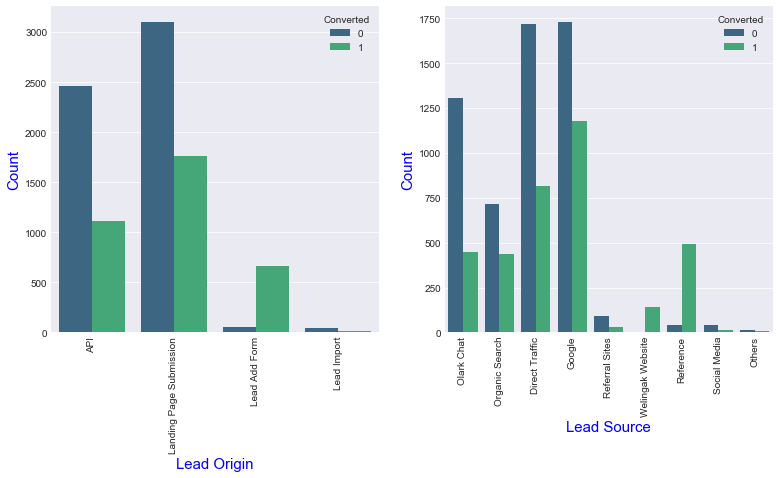

In [80]:
# Plot 'Lead Origin' & 'Lead Source' 
plotcategorical('Lead Origin', 'Lead Source')

**Insights:**

<br> **Leads Origin**
1. Most of the leads were originated from Landing Page Submission. Many of them are not getting converted
2. API has worst conversion ratio followed by Landing page submissions
3. Add form leads have very good conversion ratio. Leads from Add form are mostly getting converted.

<br> **Leads Source**
1. Most of the leads were from Google and Direct Traffic. Google also has a better conversion ratio
2. Most of the leads from References and Welingak website are getting converted

#### Visualization of 'Do Not Email' and 'A free copy of Mastering The Interview'

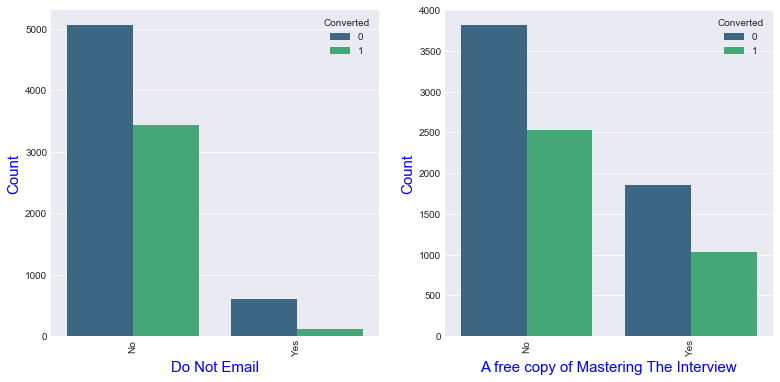

In [81]:
# Plot 'Do Not Email' & 'A free copy of Mastering The Interview' 
plotcategorical('Do Not Email', 'A free copy of Mastering The Interview')


**Insights:**

<br> **Do Not Email**
1. Good Majority of the leads allowed Email Communication
2. Conversion rate of Leads who allowed Email Communication are comparatively better than those who did not allow it.

<br> **A free copy of Mastering The Interview**
1. Most of the leads haven't opted for free copy of mastering the Interview
2. This doesn't through any encouraging insights into the Conversion rate

#### Visualization of 'What is your current occupation'

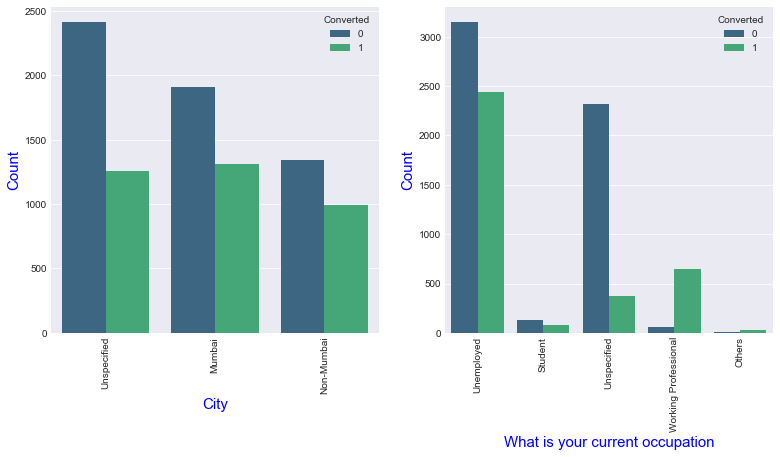

In [82]:
# Plot 'City', 'What is your current occupation'
plotcategorical('City', 'What is your current occupation')

**Insights:**

<br> **City**
1. Non-Mumbai has slightly better conversion rate. Unspecified has worst.

<br> **What is your current occupation**
1. Most of the leads are Unemployed. This is believable as people without job would be looking to upskill themselves so that their prospect of landing a job improves
2. Though comparatively fewer in number, Working professionals have good conversion ratio

#### Visualization of  ''Last Activity''

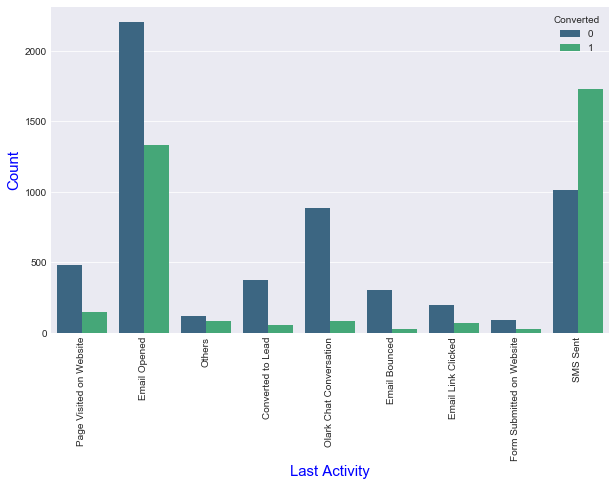

In [83]:
# Plot 'Last Activity'

plt.figure(figsize=(10,6))
sns.countplot(x='Last Activity',data=leads,hue='Converted',palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Last Activity',fontdict={'fontsize':15, 'color':'Blue'})
plt.ylabel('Count',fontdict={'fontsize':15, 'color':'Blue'})
plt.show()

**Insights:**

<br> **Last Activity**
1. Last Activity of most of the leads are Email Opened followed by SMS Sent
2. Leads whose last activity is SMS sent has good conversion ratio

### 3.2: Analysis of Numerical Variables

In [84]:
# List of Numerical variables
leads.columns[leads.dtypes!='object']

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

'Lead Number' is a unique number per entry therefore we can leave that out from our analysis. 'Converted' variable is the Target Class, which is also categorical varible

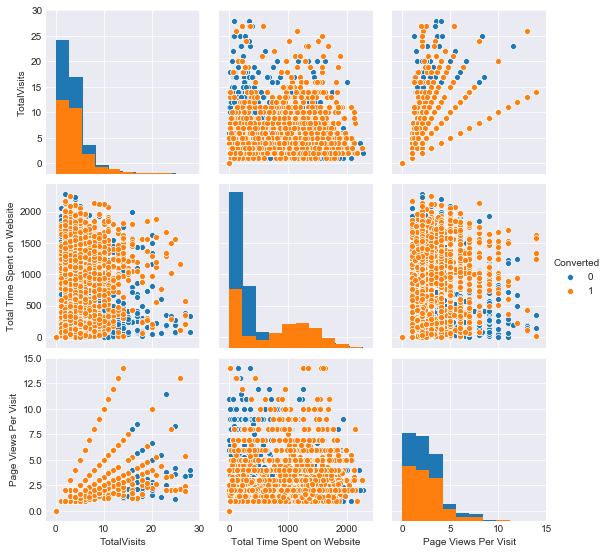

In [85]:
# Analysis of numerical variables
sns.pairplot(data = leads, vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'],hue='Converted',diag_kind='hist')
plt.show()

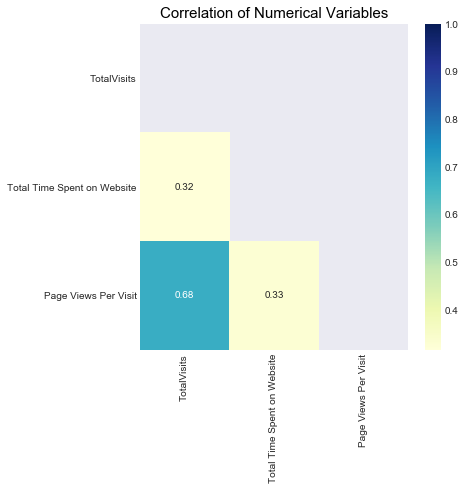

In [86]:
# Heatmap to show Correlation of Numerical Variables
fig = plt.figure(figsize = (6,6))
corr_matrix = leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr_matrix, mask=mask, cmap = "YlGnBu", annot = True,fmt='.2f', vmax = 1)
plt.title('Correlation of Numerical Variables', fontdict={'fontsize':15, 'color':'black'})
plt.show()

We can see that Total Visits and Page Views Per Visit has good correlation. Lets explore them further

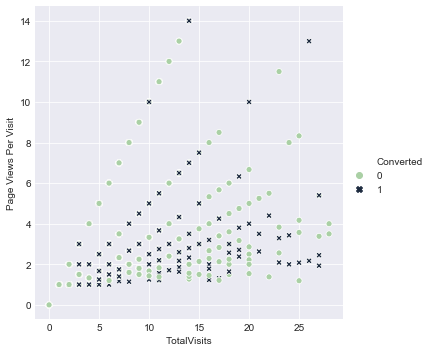

In [87]:
# plot of 'TotalVisits' v/s 'Page Views Per Visit'
sns.relplot(x="TotalVisits", y="Page Views Per Visit", 
            hue="Converted", palette="ch:r=-.5,l=.75", data=leads, style="Converted",height=5);
plt.show()

**Insights:**
1. Total Visits and Page Views Per Visit have good positive correlation
2. We can also observe that the leads with Lesser Page Views Per Visit have better chance of conversion

## 4: Data Preparation

### 4.1 Checking Balance of Target Class

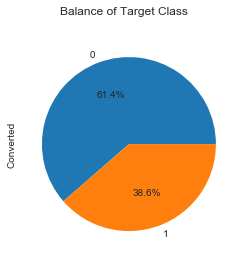

In [88]:
# Checking Balance of Target Class
#fig = plt.figure(figsize = (6,5))
plt.suptitle('Balance of Target Class', fontsize = 12)
leads['Converted'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%')
plt.show()

**Observation:** Though not perfectly balanced still has good enough balance in the data

### 4.2 Converting some binary variables (Yes/No) to 0/1

In [89]:
# List of variables to map
varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']
leads[varlist]=leads[varlist].apply(lambda x: x.map({'Yes': 1, "No": 0}))
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin,Lead Source,City,What is your current occupation,Do Not Email,A free copy of Mastering The Interview,Last Activity
0,660737,0,0.0,0,0.0,API,Olark Chat,Unspecified,Unemployed,0,0,Page Visited on Website
1,660728,0,5.0,674,2.5,API,Organic Search,Unspecified,Unemployed,0,0,Email Opened
2,660727,1,2.0,1532,2.0,Landing Page Submission,Direct Traffic,Mumbai,Student,0,1,Email Opened
3,660719,0,1.0,305,1.0,Landing Page Submission,Direct Traffic,Mumbai,Unemployed,0,0,Others
4,660681,1,2.0,1428,1.0,Landing Page Submission,Google,Mumbai,Unemployed,0,0,Converted to Lead


### 4.3 Creating Dummy Features (One-Hot Encoding) for categorical variables with multiple levels

In [90]:
# Lets rename variable name 'What is your current occupation' as 'Occupation'
leads.rename(columns={'What is your current occupation': 'Occupation'}, inplace=True)
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin,Lead Source,City,Occupation,Do Not Email,A free copy of Mastering The Interview,Last Activity
0,660737,0,0.0,0,0.0,API,Olark Chat,Unspecified,Unemployed,0,0,Page Visited on Website
1,660728,0,5.0,674,2.5,API,Organic Search,Unspecified,Unemployed,0,0,Email Opened
2,660727,1,2.0,1532,2.0,Landing Page Submission,Direct Traffic,Mumbai,Student,0,1,Email Opened
3,660719,0,1.0,305,1.0,Landing Page Submission,Direct Traffic,Mumbai,Unemployed,0,0,Others
4,660681,1,2.0,1428,1.0,Landing Page Submission,Google,Mumbai,Unemployed,0,0,Converted to Lead


In [91]:
leads.select_dtypes(include=['object','category']).columns

Index(['Lead Origin', 'Lead Source', 'City', 'Occupation', 'Last Activity'], dtype='object')

In [92]:
# Creating dummy variables for the remaining categorical variables and dropping one levels which does not make business sense

# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(leads['Lead Origin'], prefix='LeadOrigin')
# Dropping 'LeadOrigin_Lead API column
lo1 = lo.drop(['LeadOrigin_API'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)

# Creating dummy variables for the variable 'Lead Source'
lo = pd.get_dummies(leads['Lead Source'], prefix='LeadSource')
# Dropping 'LeadSource_Others' column
lo1 = lo.drop(['LeadSource_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)

# Creating dummy variables for the variable 'City'
lo = pd.get_dummies(leads['City'], prefix='City')
# Dropping 'City_Unspecified' column
lo1 = lo.drop(['City_Unspecified'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'
lna = pd.get_dummies(leads['Occupation'], prefix='Occupation')
# Dropping 'LastNotableActivity_Others' column
lna1 = lna.drop(['Occupation_Unspecified'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,lna1], axis=1)

# Creating dummy variables for the variable 'Last Activity'
lna = pd.get_dummies(leads['Last Activity'], prefix='LastActivity')
# Dropping 'LastActivity_Others' column
lna1 = lna.drop(['LastActivity_Converted to Lead'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,lna1], axis=1)

# Dropping variables for which dummies are created
leads = leads.drop(['Lead Origin', 'Lead Source', 'City', 'Occupation','Last Activity'], 1)

In [93]:
# Variables in the dataframe
leads.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Do Not Email',
       'A free copy of Mastering The Interview',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadOrigin_Lead Import', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Reference',
       'LeadSource_Referral Sites', 'LeadSource_Social Media',
       'LeadSource_Welingak Website', 'City_Mumbai', 'City_Non-Mumbai',
       'Occupation_Others', 'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'LastActivity_Email Bounced',
       'LastActivity_Email Link Clicked', 'LastActivity_Email Opened',
       'LastActivity_Form Submitted on Website',
       'LastActivity_Olark Chat Conversation', 'LastActivity_Others',
       'LastActivity_Page Visited on Website', 'LastActivity_SMS Sent'],
      dtype='object')

Before dropping Lead Number, save the dataframe so that the lead scores can be assigned readily

In [94]:
# Lets drop 'Lead Number' from the analysis
leads_df = leads.copy(deep=True)
leads.drop('Lead Number',axis=1,inplace=True)
leads.head(2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_Welingak Website,City_Mumbai,City_Non-Mumbai,Occupation_Others,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [95]:
leads_df.shape

(9218, 32)

In [96]:
leads.shape

(9218, 31)

### 4.4 Checking Correlations

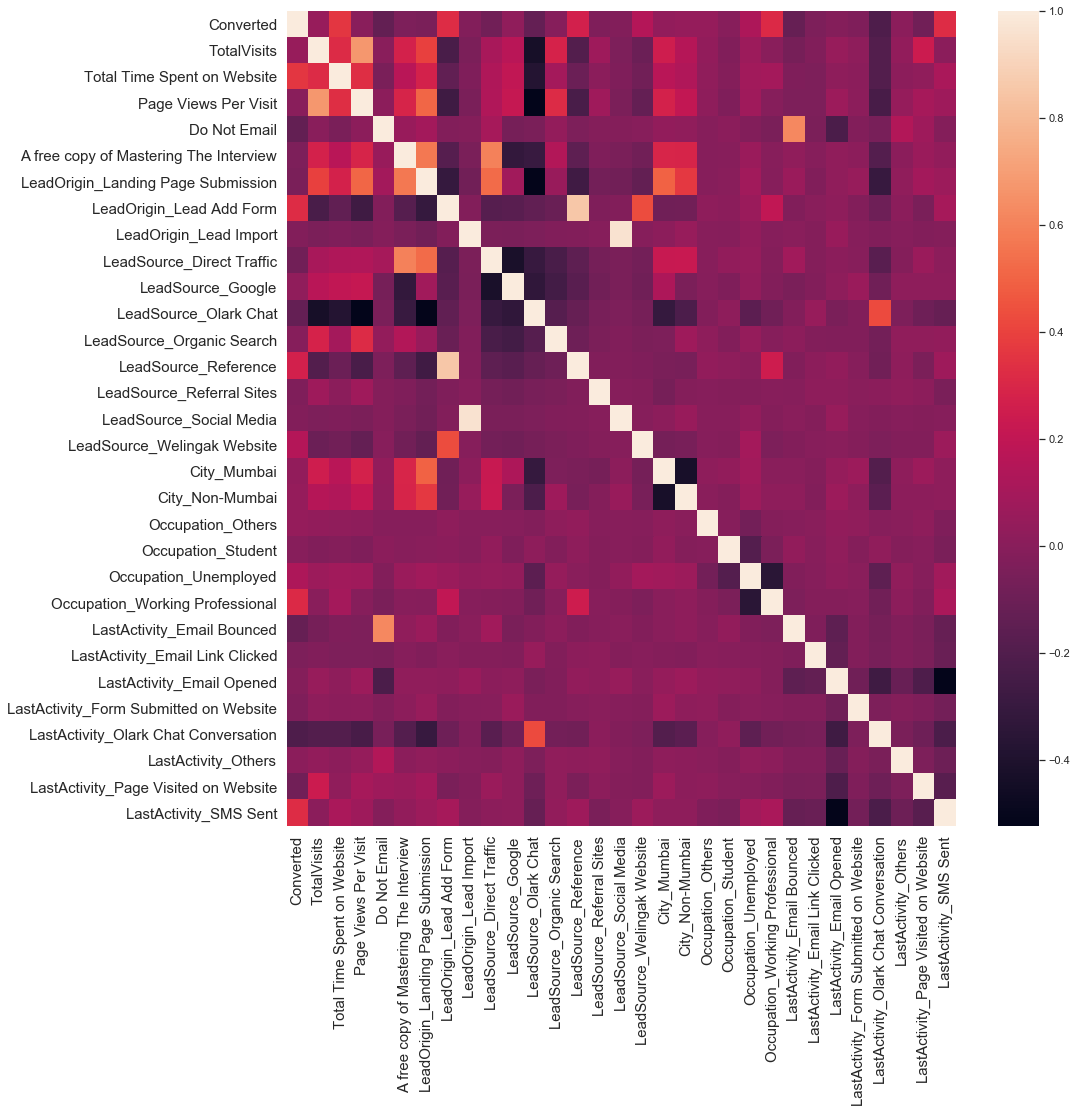

In [97]:
# Let's see the correlation matrix
sns.set(font_scale=1.0)
fig,ax= plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(leads.corr())
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

There are high correlations between few variables. These are retained for now and are treated during Feature elimination after checking their multicollinearity

### 4.5 Splitting data into Test-Train datasets

In [98]:
from sklearn.model_selection import train_test_split

# Creation of feature(X) and response(y) datasets
X = leads.drop(['Converted'], axis=1)
y = leads['Converted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### 4.6 Feature Scaling

In [99]:
# Scaling of 'TotalVisits','Total Time Spent on Website' and 'Page Views Per Visit' variables using MinMax Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [100]:
X_test.head(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_Welingak Website,City_Mumbai,City_Non-Mumbai,Occupation_Others,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent
1752,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4863,0.214286,0.615757,0.428571,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0


In [101]:
# Check the size of the train and test dataset for independent Variables
print (X_train.shape, X_test.shape)

(7374, 30) (1844, 30)


In [102]:
# Check the size of the train and test dataset for dependent Variables
print (y_train.shape, y_test.shape)

(7374,) (1844,)


## 5: Model Building

### 5.1 Model-1: building the first training model with all variables

In [103]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7374
Model:                            GLM   Df Residuals:                     7343
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2960.2
Date:                Sat, 06 Mar 2021   Deviance:                       5920.3
Time:                        20:56:13   Pearson chi2:                 7.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -4.3106      0.792     -5.443      0.000      -5.863      -2.759
TotalVisits                                1.9060      0.375      5.087      0.000       1.172       2.640
Total Time Spent on Website                4.4177      0.157     28.187      0.000       4.111       4.725
Page Views Per Visit                      -1.7026      0.348     -4.888      0.000      -2.385      -1.020
Do Not Email                              -1.0936      0.176     -6.206      0.000      -1.439      -0.748
A free copy of Mastering The Interview    -0.2085      0.102     -2.039      0.041      -0.409      -0.008
LeadOrigin_Landing Page Submission        -0.7882      0.136     -5.813      0.000      -1.054      -0.522
LeadOrigin_Lead Add Form                   2.6205      0.490      5.351      0.000       1.661       3.580
LeadOrigin_Lead Import                    -1.3026      1.455     -0.895      0.371      -4.155       1.550
LeadSource_Direct Traffic                 -0.1220      0.767     -0.159      0.874      -1.625       1.381
LeadSource_Google                          0.0801      0.763      0.105      0.916      -1.414       1.575
LeadSource_Olark Chat                      1.1929      0.771      1.547      0.122      -0.318       2.704
LeadSource_Organic Search                  0.0637      0.770      0.083      0.934      -1.445       1.572
LeadSource_Reference                       0.2873      0.836      0.344      0.731      -1.351       1.926
LeadSource_Referral Sites                 -0.2531      0.824     -0.307      0.759      -1.868       1.362
LeadSource_Social Media                    0.5017      1.586      0.316      0.752      -2.607       3.611
LeadSource_Welingak Website                2.8388      1.089      2.607      0.009       0.705       4.973
City_Mumbai                                0.9769      0.135      7.228      0.000       0.712       1.242
City_Non-Mumbai                            0.9781      0.135      7.262      0.000       0.714       1.242
Occupation_Others                          2.3376      0.473      4.943      0.000       1.411       3.264
Occupation_Student                         1.3041      0.220      5.929      0.000       0.873       1.735
Occupation_Unemployed                      1.2067      0.083     14.570      0.000       1.044       1.369
Occupation_Working Professional            3.6974      0.197     18.789      0.000       3.312       4.083
LastActivity_Email Bounced                 0.2080      0.388      0.536      0.592      -0.552       0.968
LastActivity_Email Link Clicked            0.7481      0.278      2.687      0.007       0.202       1.294
LastActivity_Email Opened                  1.1358      0.206      5.514      0.000     

We can observe that several features have higher p-values. Lets use Recursive Feature Elimination (RFE) to select top 20 features and thereafter we can explore the possibility of further feature elimination manually based on p-values(significance of features), VIFs (Multicolinearity) and feature importance

### 5.2 Model-2: Feature selection using RFE

In [104]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
# running RFE with 20 variables as output
rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Do Not Email', True, 1),
 ('A free copy of Mastering The Interview', False, 9),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', True, 1),
 ('LeadSource_Direct Traffic', False, 5),
 ('LeadSource_Google', False, 8),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 7),
 ('LeadSource_Reference', False, 10),
 ('LeadSource_Referral Sites', False, 4),
 ('LeadSource_Social Media', False, 6),
 ('LeadSource_Welingak Website', True, 1),
 ('City_Mumbai', True, 1),
 ('City_Non-Mumbai', True, 1),
 ('Occupation_Others', True, 1),
 ('Occupation_Student', True, 1),
 ('Occupation_Unemployed', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('LastActivity_Email Bounced', False, 11),
 ('LastActivity_Email Link Clicked', True, 1),
 ('LastActivity_Email Opened', True, 1),
 ('LastActivity_Form Sub

In [105]:
# Selected Variables
col = X_train.columns[rfe.support_]

# Eliminated Variables
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Reference', 'LeadSource_Referral Sites',
       'LeadSource_Social Media', 'LastActivity_Email Bounced',
       'LastActivity_Form Submitted on Website',
       'LastActivity_Page Visited on Website'],
      dtype='object')

##### Assessing the model with StatsModels

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7374
Model:                            GLM   Df Residuals:                     7353
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2972.3
Date:                Sat, 06 Mar 2021   Deviance:                       5944.5
Time:                        20:56:14   Pearson chi2:                 7.81e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.9739      0.158    -25.170      0.000      -4.283      -3.664
TotalVisits                              2.0305      0.360      5.642      0.000       1.325       2.736
Total Time Spent on Website              4.4383      0.156     28.391      0.000       4.132       4.745
Page Views Per Visit                    -1.5469      0.339     -4.560      0.000      -2.212      -0.882
Do Not Email                            -1.1344      0.159     -7.114      0.000      -1.447      -0.822
LeadOrigin_Landing Page Submission      -0.9390      0.129     -7.286      0.000      -1.192      -0.686
LeadOrigin_Lead Add Form                 2.9034      0.204     14.239      0.000       2.504       3.303
LeadOrigin_Lead Import                  -0.7748      0.429     -1.805      0.071      -1.616       0.066
LeadSource_Olark Chat                    1.2071      0.128      9.402      0.000       0.955       1.459
LeadSource_Welingak Website              2.5730      0.744      3.456      0.001       1.114       4.032
City_Mumbai                              0.9503      0.130      7.287      0.000       0.695       1.206
City_Non-Mumbai                          0.9283      0.131      7.101      0.000       0.672       1.185
Occupation_Others                        2.3837      0.475      5.020      0.000       1.453       3.314
Occupation_Student                       1.3003      0.217      5.981      0.000       0.874       1.726
Occupation_Unemployed                    1.2058      0.083     14.567      0.000       1.044       1.368
Occupation_Working Professional          3.6799      0.195     18.831      0.000       3.297       4.063
LastActivity_Email Link Clicked          0.4023      0.218      1.846      0.065      -0.025       0.829
LastActivity_Email Opened                0.7853      0.114      6.887      0.000       0.562       1.009
LastActivity_Olark Chat Conversation    -0.6647      0.186     -3.579      0.000      -1.029      -0.301
LastActivity_Others                      1.2839      0.231      5.559      0.000       0.831       1.737
LastActivity_SMS Sent                    2.0007      0.116     17.304      0.000       1.774       2.227
========================================================================================================
"""

##### Let's check the VIFs

In [107]:
# This is a custom function to calculate VIF
def calc_VIF(X_train):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    df_vif = pd.DataFrame()
    df_vif['Features'] = X_train.columns
    df_vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    df_vif['VIF'] = round(df_vif['VIF'], 2)
    df_vif.sort_values(by='VIF', ascending=False, inplace=True)
    return df_vif

In [108]:
# Check VIF
vif=calc_VIF(X_train[col])
vif.head(7)

,Features,VIF
4,LeadOrigin_Landing Page Submission,7.94
9,City_Mumbai,5.45
2,Page Views Per Visit,5.33
10,City_Non-Mumbai,4.07
0,TotalVisits,3.72
13,Occupation_Unemployed,3.03
16,LastActivity_Email Opened,2.99


***check the performance metrics***

In [109]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Classification report
from sklearn.metrics import classification_report
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted']))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      4531
           1       0.79      0.71      0.75      2843

    accuracy                           0.82      7374
   macro avg       0.81      0.80      0.80      7374
weighted avg       0.82      0.82      0.82      7374



We can observe that few features have higher p-values, VIF etc. Lets drop these sets.

### 5.3 Model iterations : Feature elimination

We can drop LeadOrigin_Lead Import due to high p-value

#### Model-3

In [110]:
col = col.drop('LeadOrigin_Lead Import', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7374
Model:                            GLM   Df Residuals:                     7354
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2974.0
Date:                Sat, 06 Mar 2021   Deviance:                       5948.0
Time:                        20:56:14   Pearson chi2:                 7.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -4.0045      0.157    -25.448      0.000      -4.313      -3.696
TotalVisits                              2.0649      0.359      5.746      0.000       1.361       2.769
Total Time Spent on Website              4.4588      0.156     28.566      0.000       4.153       4.765
Page Views Per Visit                    -1.5011      0.338     -4.442      0.000      -2.163      -0.839
Do Not Email                            -1.1358      0.159     -7.122      0.000      -1.448      -0.823
LeadOrigin_Landing Page Submission      -0.8708      0.123     -7.079      0.000      -1.112      -0.630
LeadOrigin_Lead Add Form                 2.9555      0.202     14.637      0.000       2.560       3.351
LeadSource_Olark Chat                    1.2472      0.127      9.854      0.000       0.999       1.495
LeadSource_Welingak Website              2.5563      0.744      3.434      0.001       1.097       4.015
City_Mumbai                              0.8926      0.126      7.077      0.000       0.645       1.140
City_Non-Mumbai                          0.8670      0.126      6.884      0.000       0.620       1.114
Occupation_Others                        2.3924      0.475      5.037      0.000       1.462       3.323
Occupation_Student                       1.3077      0.217      6.022      0.000       0.882       1.733
Occupation_Unemployed                    1.2085      0.083     14.600      0.000       1.046       1.371
Occupation_Working Professional          3.6870      0.195     18.869      0.000       3.304       4.070
LastActivity_Email Link Clicked          0.4005      0.218      1.838      0.066      -0.027       0.828
LastActivity_Email Opened                0.7803      0.114      6.839      0.000       0.557       1.004
LastActivity_Olark Chat Conversation    -0.6658      0.186     -3.585      0.000      -1.030      -0.302
LastActivity_Others                      1.2855      0.231      5.565      0.000       0.833       1.738
LastActivity_SMS Sent                    1.9939      0.116     17.243      0.000       1.767       2.221
========================================================================================================
"""

##### Let's check the VIFs

In [111]:
# Print VIF
vif=calc_VIF(X_train[col])
vif.head(5)

,Features,VIF
4,LeadOrigin_Landing Page Submission,7.52
2,Page Views Per Visit,5.32
8,City_Mumbai,5.20
9,City_Non-Mumbai,3.87
0,TotalVisits,3.71


Lets drop LastActivity_Email Link Clicked due to p value > 0.03

#### Model-4

In [112]:
col = col.drop('LastActivity_Email Link Clicked', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7374
Model:                            GLM   Df Residuals:                     7355
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2975.7
Date:                Sat, 06 Mar 2021   Deviance:                       5951.3
Time:                        20:56:15   Pearson chi2:                 7.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.9241      0.150    -26.188      0.000      -4.218      -3.630
TotalVisits                              2.0346      0.358      5.676      0.000       1.332       2.737
Total Time Spent on Website              4.4538      0.156     28.567      0.000       4.148       4.759
Page Views Per Visit                    -1.4685      0.337     -4.359      0.000      -2.129      -0.808
Do Not Email                            -1.1649      0.158     -7.355      0.000      -1.475      -0.854
LeadOrigin_Landing Page Submission      -0.8682      0.123     -7.058      0.000      -1.109      -0.627
LeadOrigin_Lead Add Form                 2.9777      0.202     14.751      0.000       2.582       3.373
LeadSource_Olark Chat                    1.2628      0.126      9.993      0.000       1.015       1.511
LeadSource_Welingak Website              2.5569      0.744      3.436      0.001       1.098       4.015
City_Mumbai                              0.8885      0.126      7.044      0.000       0.641       1.136
City_Non-Mumbai                          0.8633      0.126      6.853      0.000       0.616       1.110
Occupation_Others                        2.3693      0.473      5.010      0.000       1.442       3.296
Occupation_Student                       1.3048      0.217      6.007      0.000       0.879       1.731
Occupation_Unemployed                    1.2093      0.083     14.613      0.000       1.047       1.372
Occupation_Working Professional          3.6868      0.195     18.893      0.000       3.304       4.069
LastActivity_Email Opened                0.6962      0.103      6.735      0.000       0.494       0.899
LastActivity_Olark Chat Conversation    -0.7549      0.179     -4.224      0.000      -1.105      -0.405
LastActivity_Others                      1.2098      0.227      5.333      0.000       0.765       1.654
LastActivity_SMS Sent                    1.9112      0.105     18.150      0.000       1.705       2.118
========================================================================================================
"""

In [113]:
# Print VIF
vif=calc_VIF(X_train[col])
vif.head(5)

,Features,VIF
4,LeadOrigin_Landing Page Submission,7.49
2,Page Views Per Visit,5.27
8,City_Mumbai,5.20
9,City_Non-Mumbai,3.86
0,TotalVisits,3.71


In [114]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Classification report
from sklearn.metrics import classification_report
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted']))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      4531
           1       0.79      0.72      0.75      2843

    accuracy                           0.82      7374
   macro avg       0.81      0.80      0.80      7374
weighted avg       0.82      0.82      0.82      7374



LEts drop LeadOrigin_Landing Page Submission due to VIF >5

#### Model-5

In [115]:
col = col.drop('LeadOrigin_Landing Page Submission', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7374
Model:                            GLM   Df Residuals:                     7356
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3000.9
Date:                Sat, 06 Mar 2021   Deviance:                       6001.7
Time:                        20:56:15   Pearson chi2:                 7.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -4.0949      0.149    -27.510      0.000      -4.387      -3.803
TotalVisits                              2.1536      0.355      6.072      0.000       1.459       2.849
Total Time Spent on Website              4.4758      0.155     28.804      0.000       4.171       4.780
Page Views Per Visit                    -1.6848      0.336     -5.017      0.000      -2.343      -1.027
Do Not Email                            -1.2067      0.157     -7.677      0.000      -1.515      -0.899
LeadOrigin_Lead Add Form                 3.3722      0.194     17.368      0.000       2.992       3.753
LeadSource_Olark Chat                    1.4885      0.122     12.161      0.000       1.249       1.728
LeadSource_Welingak Website              2.3503      0.743      3.163      0.002       0.894       3.807
City_Mumbai                              0.2735      0.090      3.031      0.002       0.097       0.450
City_Non-Mumbai                          0.2798      0.094      2.980      0.003       0.096       0.464
Occupation_Others                        2.4394      0.477      5.116      0.000       1.505       3.374
Occupation_Student                       1.3133      0.214      6.151      0.000       0.895       1.732
Occupation_Unemployed                    1.2347      0.082     15.001      0.000       1.073       1.396
Occupation_Working Professional          3.7109      0.195     19.027      0.000       3.329       4.093
LastActivity_Email Opened                0.7269      0.103      7.072      0.000       0.525       0.928
LastActivity_Olark Chat Conversation    -0.7150      0.177     -4.031      0.000      -1.063      -0.367
LastActivity_Others                      1.2372      0.226      5.473      0.000       0.794       1.680
LastActivity_SMS Sent                    1.8968      0.105     18.084      0.000       1.691       2.102
========================================================================================================
"""

In [116]:
# Print VIF
vif=calc_VIF(X_train[col])
vif.head(5)

,Features,VIF
2,Page Views Per Visit,5.15
0,TotalVisits,3.71
11,Occupation_Unemployed,2.99
13,LastActivity_Email Opened,2.71
7,City_Mumbai,2.42


In [117]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Classification report
from sklearn.metrics import classification_report
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted']))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4531
           1       0.80      0.70      0.75      2843

    accuracy                           0.82      7374
   macro avg       0.81      0.80      0.80      7374
weighted avg       0.81      0.82      0.81      7374



Lets drop Page Views Per Visit due to VIF >5

#### Model-6

In [118]:
col = col.drop('Page Views Per Visit',1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7374
Model:                            GLM   Df Residuals:                     7357
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3013.7
Date:                Sat, 06 Mar 2021   Deviance:                       6027.4
Time:                        20:56:16   Pearson chi2:                 7.78e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -4.2282      0.147    -28.844      0.000      -4.515      -3.941
TotalVisits                              1.2880      0.311      4.146      0.000       0.679       1.897
Total Time Spent on Website              4.4670      0.155     28.793      0.000       4.163       4.771
Do Not Email                            -1.2286      0.157     -7.824      0.000      -1.536      -0.921
LeadOrigin_Lead Add Form                 3.5788      0.190     18.834      0.000       3.206       3.951
LeadSource_Olark Chat                    1.6895      0.116     14.534      0.000       1.462       1.917
LeadSource_Welingak Website              2.3440      0.743      3.157      0.002       0.889       3.799
City_Mumbai                              0.2256      0.089      2.522      0.012       0.050       0.401
City_Non-Mumbai                          0.2347      0.093      2.519      0.012       0.052       0.417
Occupation_Others                        2.4361      0.474      5.142      0.000       1.508       3.365
Occupation_Student                       1.3162      0.214      6.159      0.000       0.897       1.735
Occupation_Unemployed                    1.2341      0.082     15.040      0.000       1.073       1.395
Occupation_Working Professional          3.6957      0.194     19.025      0.000       3.315       4.076
LastActivity_Email Opened                0.6582      0.101      6.499      0.000       0.460       0.857
LastActivity_Olark Chat Conversation    -0.7665      0.176     -4.345      0.000      -1.112      -0.421
LastActivity_Others                      1.1517      0.225      5.127      0.000       0.711       1.592
LastActivity_SMS Sent                    1.8084      0.103     17.618      0.000       1.607       2.010
========================================================================================================
"""

In [119]:
# Print VIF
vif=calc_VIF(X_train[col])
vif.head()

,Features,VIF
10,Occupation_Unemployed,2.97
0,TotalVisits,2.54
12,LastActivity_Email Opened,2.51
6,City_Mumbai,2.32
15,LastActivity_SMS Sent,2.22


Let us drop City_Non-Mumbai due to p-value > 0.03

#### Model-7

##### check for obvious similarities in feature importance

In [120]:
round(res.params,3)

const                                  -4.228
TotalVisits                             1.288
Total Time Spent on Website             4.467
Do Not Email                           -1.229
LeadOrigin_Lead Add Form                3.579
LeadSource_Olark Chat                   1.689
LeadSource_Welingak Website             2.344
City_Mumbai                             0.226
City_Non-Mumbai                         0.235
Occupation_Others                       2.436
Occupation_Student                      1.316
Occupation_Unemployed                   1.234
Occupation_Working Professional         3.696
LastActivity_Email Opened               0.658
LastActivity_Olark Chat Conversation   -0.766
LastActivity_Others                     1.152
LastActivity_SMS Sent                   1.808
dtype: float64

Observation: City_Mumbai and City_Non-Mumbai are opposite variables. However the feature importance value is nearly the same. 0.96 vs. 0.94. Intuitiely, we could even drop them both. But lets drop one variable at a time this time City_Non-Mumbai

In [121]:
col = col.drop('City_Non-Mumbai',1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7374
Model:                            GLM   Df Residuals:                     7358
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3016.9
Date:                Sat, 06 Mar 2021   Deviance:                       6033.8
Time:                        20:56:16   Pearson chi2:                 7.78e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -4.1224      0.140    -29.535      0.000      -4.396      -3.849
TotalVisits                              1.3715      0.308      4.446      0.000       0.767       1.976
Total Time Spent on Website              4.4789      0.155     28.891      0.000       4.175       4.783
Do Not Email                            -1.2186      0.157     -7.755      0.000      -1.527      -0.911
LeadOrigin_Lead Add Form                 3.5351      0.189     18.697      0.000       3.165       3.906
LeadSource_Olark Chat                    1.5999      0.110     14.557      0.000       1.384       1.815
LeadSource_Welingak Website              2.2808      0.742      3.074      0.002       0.826       3.735
City_Mumbai                              0.0890      0.071      1.257      0.209      -0.050       0.228
Occupation_Others                        2.4530      0.474      5.175      0.000       1.524       3.382
Occupation_Student                       1.3347      0.213      6.262      0.000       0.917       1.752
Occupation_Unemployed                    1.2493      0.082     15.271      0.000       1.089       1.410
Occupation_Working Professional          3.7168      0.194     19.134      0.000       3.336       4.098
LastActivity_Email Opened                0.6669      0.101      6.599      0.000       0.469       0.865
LastActivity_Olark Chat Conversation    -0.7952      0.176     -4.529      0.000      -1.139      -0.451
LastActivity_Others                      1.1511      0.224      5.132      0.000       0.712       1.591
LastActivity_SMS Sent                    1.8103      0.103     17.650      0.000       1.609       2.011
========================================================================================================
"""

Let us drop City_Mumbai due to p-value > 0.03

#### Model-8

In [122]:
col = col.drop('City_Mumbai',1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7374
Model:                            GLM   Df Residuals:                     7359
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3017.7
Date:                Sat, 06 Mar 2021   Deviance:                       6035.3
Time:                        20:56:16   Pearson chi2:                 7.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -4.0888      0.137    -29.896      0.000      -4.357      -3.821
TotalVisits                              1.4058      0.307      4.577      0.000       0.804       2.008
Total Time Spent on Website              4.4759      0.155     28.894      0.000       4.172       4.780
Do Not Email                            -1.2172      0.157     -7.745      0.000      -1.525      -0.909
LeadOrigin_Lead Add Form                 3.5242      0.189     18.659      0.000       3.154       3.894
LeadSource_Olark Chat                    1.5705      0.107     14.653      0.000       1.360       1.781
LeadSource_Welingak Website              2.2601      0.742      3.047      0.002       0.806       3.714
Occupation_Others                        2.4614      0.473      5.205      0.000       1.535       3.388
Occupation_Student                       1.3453      0.213      6.324      0.000       0.928       1.762
Occupation_Unemployed                    1.2528      0.082     15.324      0.000       1.093       1.413
Occupation_Working Professional          3.7202      0.194     19.154      0.000       3.340       4.101
LastActivity_Email Opened                0.6666      0.101      6.597      0.000       0.469       0.865
LastActivity_Olark Chat Conversation    -0.8034      0.175     -4.581      0.000      -1.147      -0.460
LastActivity_Others                      1.1524      0.224      5.145      0.000       0.713       1.591
LastActivity_SMS Sent                    1.8088      0.103     17.638      0.000       1.608       2.010
========================================================================================================
"""

#### Model-9

In [123]:
# Lets check Occupation_Others
print ('How many % of leads are with Occupation Others:', round(leads['Occupation_Others'].sum()/leads.shape[0]*100, 2), "%")

How many % of leads are with Occupation Others: 0.37 %


Occupation_Others is a low freqency customer. Number of data points is under represented and this variable cannot be reliable  even if it is retained. Therefore dropped from the model.

In [124]:
col = col.drop('Occupation_Others',1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7374
Model:                            GLM   Df Residuals:                     7360
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3032.0
Date:                Sat, 06 Mar 2021   Deviance:                       6064.1
Time:                        20:56:17   Pearson chi2:                 7.88e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -4.0273      0.135    -29.732      0.000      -4.293      -3.762
TotalVisits                              1.4375      0.307      4.682      0.000       0.836       2.039
Total Time Spent on Website              4.4869      0.155     29.020      0.000       4.184       4.790
Do Not Email                            -1.2169      0.157     -7.759      0.000      -1.524      -0.910
LeadOrigin_Lead Add Form                 3.5718      0.189     18.889      0.000       3.201       3.942
LeadSource_Olark Chat                    1.5573      0.107     14.579      0.000       1.348       1.767
LeadSource_Welingak Website              2.2187      0.742      2.991      0.003       0.765       3.673
Occupation_Student                       1.2817      0.212      6.038      0.000       0.866       1.698
Occupation_Unemployed                    1.1915      0.080     14.878      0.000       1.035       1.348
Occupation_Working Professional          3.6560      0.193     18.897      0.000       3.277       4.035
LastActivity_Email Opened                0.6674      0.101      6.615      0.000       0.470       0.865
LastActivity_Olark Chat Conversation    -0.8033      0.175     -4.588      0.000      -1.146      -0.460
LastActivity_Others                      1.1489      0.223      5.158      0.000       0.712       1.585
LastActivity_SMS Sent                    1.7894      0.102     17.490      0.000       1.589       1.990
========================================================================================================
"""

In [125]:
# Print VIF
vif=calc_VIF(X_train[col])
vif

,Features,VIF
7,Occupation_Unemployed,2.74
0,TotalVisits,2.31
9,LastActivity_Email Opened,2.27
1,Total Time Spent on Website,2.14
12,LastActivity_SMS Sent,2.11
4,LeadSource_Olark Chat,1.80
3,LeadOrigin_Lead Add Form,1.59
10,LastActivity_Olark Chat Conversation,1.58
8,Occupation_Working Professional,1.39
5,LeadSource_Welingak Website,1.27


In [126]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Classification report
from sklearn.metrics import classification_report
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted']))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      4531
           1       0.80      0.70      0.74      2843

    accuracy                           0.81      7374
   macro avg       0.81      0.79      0.80      7374
weighted avg       0.81      0.81      0.81      7374



In [127]:
len(col)

13

# 6: Evaluation of Trained Model

### 6.1 Evaluation of Model using Metrics

In [128]:
# Let's take a look at the confusion matrix again
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[4020,  511],
       [ 861, 1982]], dtype=int64)

In [129]:
# This is custom function to calculate various evaluation metrics of the model

def calc_METRICS (actual, predicted, pred_probablity):
    from sklearn import metrics
    # confusion matrix
    confusion = metrics.confusion_matrix(actual,predicted)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives  
    # calculate metrics
    accuracy = metrics.accuracy_score(actual,predicted)
    sensitivity = TP /float(TP+FN)
    specificity = TN /float (TN+FP)
    precision = metrics.precision_score(actual,predicted)
    recall = metrics.recall_score(actual,predicted)
    true_positive_rate = TP /float(TP+FN)
    false_positive_rate = FP /float(TN+FP)
    false_negative_rate = FN /float(TP+FN)
    positive_predictive_val = TP /float(TP+FP)
    negative_predictive_val = TN /float(TN+FN)
    f1_score = 2*(precision*recall)/(precision+recall)
    gini_score = metrics.roc_auc_score(actual,pred_probablity)    
    # create dict and assign to a dataframe
    metrics_dict = {'Accuracy': accuracy, 'Sensitivity': sensitivity, 'Specificity': specificity, 
                    'Precision': precision, 'Recall': recall, 
                    'TPR': true_positive_rate , 'FPR': false_positive_rate, 'FNR': false_negative_rate, 
                    'Positive Predictive Value': positive_predictive_val, 'Negative Predictive Value': negative_predictive_val,
                    'F1 Score': f1_score, 'Gini Score (Area under ROC)': gini_score}
    df_metrics = pd.DataFrame.from_dict(metrics_dict, orient='index')
    df_metrics.reset_index(inplace=True)
    df_metrics.rename(columns={'index': 'Evaluation Metrics', 0: 'Value'}, inplace=True)
    return df_metrics  

In [130]:
# Print Evaluation Metrics
eval_metrics=calc_METRICS(y_train_pred_final['Converted'], 
                          y_train_pred_final['predicted'], 
                          y_train_pred_final['Converted_Prob'])
eval_metrics.round(2)

,Evaluation Metrics,Value
0,Accuracy,0.81
1,Sensitivity,0.70
2,Specificity,0.89
3,Precision,0.80
4,Recall,0.70
5,TPR,0.70
6,FPR,0.11
7,FNR,0.30
8,Positive Predictive Value,0.80
9,Negative Predictive Value,0.82


**Observations:** 
- We  have good Accuracy and specificity. 
- We have considered a threshold of 0.5. Lets Check if any other threshold produces best result.
- Which one of Sensitivity and specificity should we maximize? What should be ideal threshold?
    - Ideally we want to maximize both Sensitivity & Specificity. But this is not possible always. There is always a trade-off.
    - Sometimes we want to be 100% sure on Predicted negatives, sometimes we want to be 100% sure on Predicted positives.
    - Sometimes we simply don’t want to compromise on sensitivity and sometimes we don’t want to compromise on specificity.
    - The threshold is set based on business problem. In this problem lets try to maintain balance. 

Lets plot ROC curve and explore further

### 6.2 Evaluation of Model using the ROC Curve

In [131]:
# Function to draw ROC Curve
def draw_roc( actual, probs ):
    # Calculating False Positive Rate, True Positive Rate and Threshold
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    #Computing AUC score
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1-Specificity]')
    plt.ylabel('True Positive Rate or [Sensitivity]')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

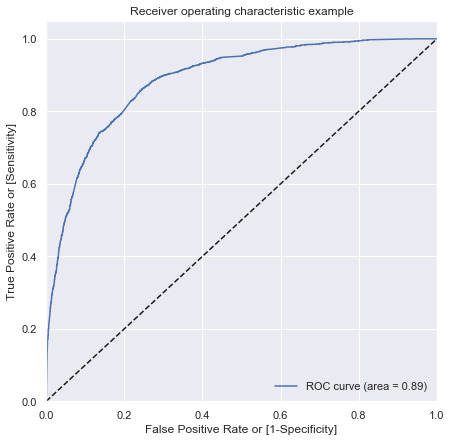

In [132]:
# Calling the function to draw ROC curve

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
- Bigger the Area Under Curve(AUC) more accurate is the test

We have good model with an AUC of 0.89

Lets find the Optimal Threshold value

### 6.3 Finding Optimal Threshold Value

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [133]:
# This is custom function to plot sensitivity specificity tradeoff & output a cutoff dataframe

def calc_sens_spec_tradeoff (y_train_df, actual, prob, linspacer):
    from sklearn import metrics
    y_train_pred_final_new = y_train_df.copy(deep=True)
    num_range = np.linspace(0,0.9,linspacer)
    
    for i in num_range:
        y_train_pred_final_new[str(round(i,2))]= y_train_pred_final_new[prob].map(lambda x: 1 if x > i else 0)
        y_train_pred_final_new.head()
    df_cutoff = pd.DataFrame( columns = ['Threshold','Accuracy','Sensitivity','Specificity'])
    
    for i in num_range:
        confusion = metrics.confusion_matrix(y_train_pred_final_new[actual],y_train_pred_final_new[str(round(i,2))])
        accuracy = metrics.accuracy_score(y_train_pred_final_new[actual],y_train_pred_final_new[str(round(i,2))])
        TN = confusion[0,0]
        FP = confusion[0,1]
        FN = confusion[1,0]
        TP = confusion[1,1]
        sensitivity = TP /float(TP+FN)
        specificity = TN /float (TN+FP)
        df_cutoff.loc[str(round(i,2))] =[ i ,accuracy,sensitivity,specificity]
    
    # Plot the sensitivity - specificity tradeoff
    df_cutoff.plot.line(x='Threshold', y=['Accuracy','Sensitivity','Specificity'])
    plt.title ('Sensitivity Specificity Trade off curve')
    plt.show() 
    
    return df_cutoff


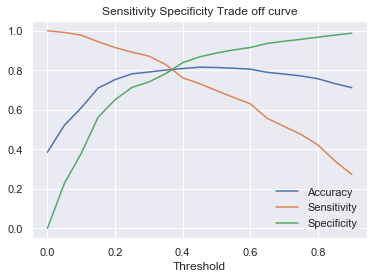

,Threshold,Accuracy,Sensitivity,Specificity
0.0,0.00,0.39,1.00,0.00
0.05,0.05,0.52,0.99,0.23
0.1,0.10,0.61,0.98,0.38
0.15,0.15,0.71,0.94,0.56
0.2,0.20,0.75,0.91,0.65
0.25,0.25,0.78,0.89,0.71
0.3,0.30,0.79,0.87,0.74
0.35,0.35,0.80,0.83,0.78
0.4,0.40,0.81,0.76,0.84
0.45,0.45,0.82,0.73,0.87


In [134]:
df_cutoff = calc_sens_spec_tradeoff(y_train_pred_final,'Converted', 'Converted_Prob',19 )
df_cutoff.round(2)

**Observation:** From the graph we can see that 0.35 could be the optimal threshold value for us. Lets predict the results using 0.35 as threshold

### 6.4 Model with optimal threshold

In [135]:
# Create a new column with optimial threshold
cut_off = 0.35
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].apply(lambda x: 1 if x>cut_off else 0)

# Output the datafram head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,final_predicted
0,1,0.160442,0,0
1,0,0.036501,0,0
2,0,0.141545,0,0
3,1,0.321084,0,0
4,0,0.230648,0,0


In [136]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3549,  982],
       [ 486, 2357]], dtype=int64)

In [137]:
# Classification report
from sklearn.metrics import classification_report
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted']))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      4531
           1       0.80      0.70      0.74      2843

    accuracy                           0.81      7374
   macro avg       0.81      0.79      0.80      7374
weighted avg       0.81      0.81      0.81      7374



In [138]:
# Print Evaluation Metrics
eval_metrics_with_optimal_cutoff=calc_METRICS(y_train_pred_final['Converted'], 
                          y_train_pred_final['final_predicted'], 
                          y_train_pred_final['Converted_Prob'])
eval_metrics_with_optimal_cutoff.round(2)

,Evaluation Metrics,Value
0,Accuracy,0.80
1,Sensitivity,0.83
2,Specificity,0.78
3,Precision,0.71
4,Recall,0.83
5,TPR,0.83
6,FPR,0.22
7,FNR,0.17
8,Positive Predictive Value,0.71
9,Negative Predictive Value,0.88


**Observation:** The graph suggests that 0.35 as the optimal threshold value. Lets now explore Precision - Recall metrics as well

### 6.5 Precision - Recall tradeoff

Similar to Sensitivity and Specificity, there will also be a trade-off between precision and recall. Ideally we want both to be higher. Lets check the Precision-Recall Curve

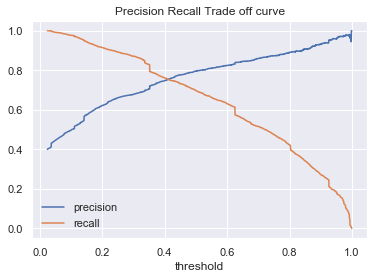

In [139]:
from sklearn.metrics import precision_recall_curve
prec, reca, threshold = precision_recall_curve(y_train_pred_final['Converted'],y_train_pred_final['Converted_Prob'])
prec_reca_df = pd.DataFrame(columns = ['threshold','precision','recall'])
prec_reca_df.precision = prec[:-1]
prec_reca_df.recall = reca[:-1]
prec_reca_df.threshold = threshold
prec_reca_df.plot.line(x='threshold', y=['precision','recall',])
plt.title ('Precision Recall Trade off curve')
plt.show()

**Observation:** As per precision-recall curve the threshold is 0.4. We can choose either choose Sensitivity-Specificity metrics or Precision-Recall metrics depending on what business better understands. Lets stick with threshold of 0.35 given by Sensitivity-Specificity metrics and proceed further.

<h4 style = 'color:blue'> Observation: Cut-off Threshold = 0.35

## 7: Making predictions on the test set

In [140]:
cut_off

0.35

In [141]:
# Retaining only variables left after feature elimination in train dataset
X_test = X_test[col]

# Adding constant to the Test Model
X_test_sm = sm.add_constant(X_test)

In [142]:
# Making predictions on test set
y_test_pred = res.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > cut_off else 0)

y_pred_final.head()

,Converted,Converted_Prob,final_predicted
1752,1,0.351827,1
4863,1,0.711465,1
4302,0,0.169140,0
6397,0,0.063823,0
6786,0,0.248570,0


## 8: Model Evaluation on Test Data

In [143]:
# Let's take a look at the confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion

array([[868, 262],
       [105, 609]], dtype=int64)

In [144]:
# Classification report
from sklearn.metrics import classification_report
print (classification_report(y_pred_final['Converted'], y_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1130
           1       0.70      0.85      0.77       714

    accuracy                           0.80      1844
   macro avg       0.80      0.81      0.80      1844
weighted avg       0.82      0.80      0.80      1844



In [145]:
# Print Evaluation Metrics
eval_metrics_test_data=calc_METRICS(y_pred_final['Converted'], 
                          y_pred_final['final_predicted'], 
                          y_pred_final['Converted_Prob'])
eval_metrics_test_data.round(2)

,Evaluation Metrics,Value
0,Accuracy,0.80
1,Sensitivity,0.85
2,Specificity,0.77
3,Precision,0.70
4,Recall,0.85
5,TPR,0.85
6,FPR,0.23
7,FNR,0.15
8,Positive Predictive Value,0.70
9,Negative Predictive Value,0.89


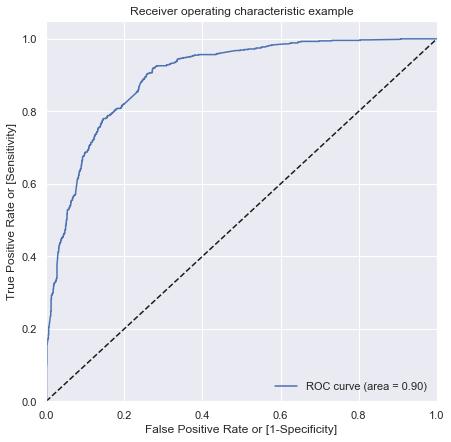

In [146]:
# Calling the function to draw ROC curve

draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob)

<h4 style = 'color:blue'> Observation: Model is performing consistently with unseen test data. 

## 9: Assigning Lead Score

In [147]:
# On train data set
y_train_pred_final['ID'] = y_train.index
indexList = list(y_train.index)
lead_num_list = list(leads_df.loc[indexList,'Lead Number'])

# Creating new columns for lead number and lead score
y_train_pred_final['Lead Number']=lead_num_list
y_train_pred_final['Lead Score']=y_train_pred_final['Converted_Prob'].apply(lambda x:round(x*100))

# Drop predicted column because we have final_predicted
y_train_pred_final.drop(columns='predicted', inplace=True)

y_train_pred_final.tail()

,Converted,Converted_Prob,final_predicted,ID,Lead Number,Lead Score
7369,0,0.110885,0,351,656682,11
7370,1,0.995567,1,79,659710,100
7371,1,0.993240,1,8059,588094,99
7372,0,0.177342,0,6955,596284,18
7373,1,0.152556,0,5655,606594,15


In [148]:
# On test data set
y_pred_final['ID'] = y_test.index
indexList = list(y_test.index)
lead_num_list = list(leads_df.loc[indexList,'Lead Number'])

# Creating new columns for lead number and lead score
y_pred_final['Lead Number']=lead_num_list
y_pred_final['Lead Score']=y_pred_final['Converted_Prob'].apply(lambda x:round(x*100))

y_pred_final.head()

,Converted,Converted_Prob,final_predicted,ID,Lead Number,Lead Score
1752,1,0.351827,1,1752,642333,35
4863,1,0.711465,1,4863,613398,71
4302,0,0.169140,0,4302,618565,17
6397,0,0.063823,0,6397,600879,6
6786,0,0.248570,0,6786,597789,25


## 10: Conclusion

In [149]:
#Final Model parameters
round(res.params,3).sort_values(ascending=False)

Total Time Spent on Website             4.487
Occupation_Working Professional         3.656
LeadOrigin_Lead Add Form                3.572
LeadSource_Welingak Website             2.219
LastActivity_SMS Sent                   1.789
LeadSource_Olark Chat                   1.557
TotalVisits                             1.437
Occupation_Student                      1.282
Occupation_Unemployed                   1.191
LastActivity_Others                     1.149
LastActivity_Email Opened               0.667
LastActivity_Olark Chat Conversation   -0.803
Do Not Email                           -1.217
const                                  -4.027
dtype: float64

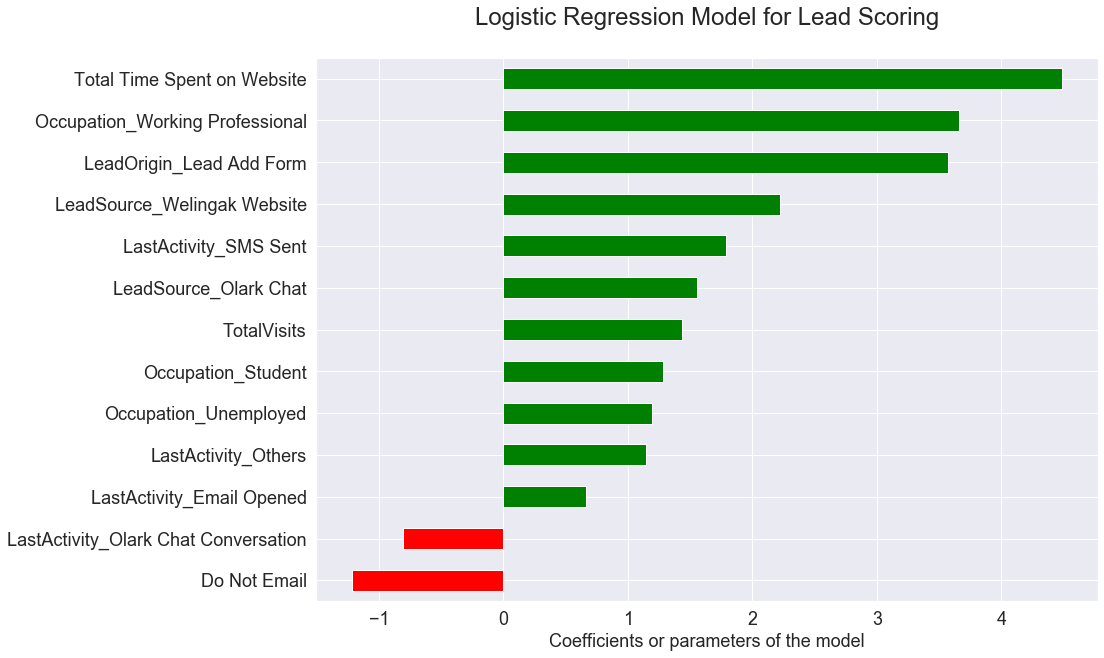

In [150]:
#Final Model parameters BAr Chart

par_series = round(res.params[1:],3).sort_values(ascending = True)
y = np.array(par_series)
cc=['colors']*len(y)
for n,val in enumerate(y):
    if val<0:
        cc[n]='red'
    elif val>=0:
        cc[n]='green'
        
plt.figure(figsize = [14,10])
par_series.plot.barh(color = cc)
plt.title('Logistic Regression Model for Lead Scoring\n', fontsize= 24)
plt.yticks(fontsize= 18)
plt.xticks(fontsize= 18)
plt.xlabel('Coefficients or parameters of the model', fontsize= 18)
plt.show()


In [151]:
# Print Evaluation Metrics
eval_metrics_test_data=calc_METRICS(y_pred_final['Converted'], 
                          y_pred_final['final_predicted'], 
                          y_pred_final['Converted_Prob'])
eval_metrics_test_data.round(2)

,Evaluation Metrics,Value
0,Accuracy,0.80
1,Sensitivity,0.85
2,Specificity,0.77
3,Precision,0.70
4,Recall,0.85
5,TPR,0.85
6,FPR,0.23
7,FNR,0.15
8,Positive Predictive Value,0.70
9,Negative Predictive Value,0.89


## Summary
1. We now have a good model that predicts Leads Conversion with 80% accuracy, 86% Sensitivity and 77% Specificity on the unseen test data.
2. CEO had set us a target of atleast 80% Sensitivity and our model yielded 86% on the unseen test data
3. Model shows very healthy F1-score of 77% & recall of 86%  with 70% precision. We could have improved precision bit more at the cost of recall if we increase the threshold from 0.35 to 0.4 however since we have decided to consider Sensitivity and Specificity metrics which gives better result at 0.35 threshold value.  
4. Gini score is also high at 90%

## Insight from Lead Scoring Case Study of X-education company:

Lead with a higher chance of conversion (top-5)
- Leads that spends higher total time spent on website
- Leads whose occupation is working professional
- Leads whose origin is from Add form 
- Leads whose source is Welingak Website
- Leads whose last activity was SMS sent

Lead with a moderate chance of conversion (middle-3)
- Leads that have higher total visits to the site, perhaps they do so to better understand or compare with competitor offerings.
- Leads whose source is Olark chat
- Leads whose occupation is student or unemployed. In other words the people who are looking to upskill.

Lead with a low chance of conversion (bottom-1)
- Leads who chose do not email option

`Submission Ganesh Nagappa Shetty & Harish Dave`